In [1]:
import trading as trading
%load_ext autoreload
%autoreload 2
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import quandl

In [2]:
# Importiamo database Mensile, Settimanale e Giornaliero
dataset = ["CHRIS/CME_YM2","CHRIS/CME_NQ1","CHRIS/CME_GC1","CHRIS/CME_EC1","CHRIS/CME_CL1"]
column = ["DJIA","Nasdaq","Gold","Euro FX","Oil"]
close_daily,open_daily,high_daily,low_daily = trading.quandl_data(dataset,column)
close_weekly,open_weekly,high_weekly,low_weekly = trading.quandl_data(dataset,column,collapse="weekly")
close_monthly,open_monthly,high_monthly,low_monthly = trading.quandl_data(dataset,column,collapse="monthly")

In [3]:
high_daily.tail(2)

DJIA_high Nasdaq_high Gold_high Euro FX_high Oil_high
Date                                                            
2020-09-24   26860.0    11011.75    1872.8      1.17065    40.37
2020-09-25   27009.0    11166.25    1871.0      1.17040    40.64

# TREND ANALYSIS

## Monthly

### Preferred Stochastic

In [4]:
k_slow_monthly,d_slow_monthly=trading.preferred_stochastic(close_monthly,high_monthly,low_monthly,column)

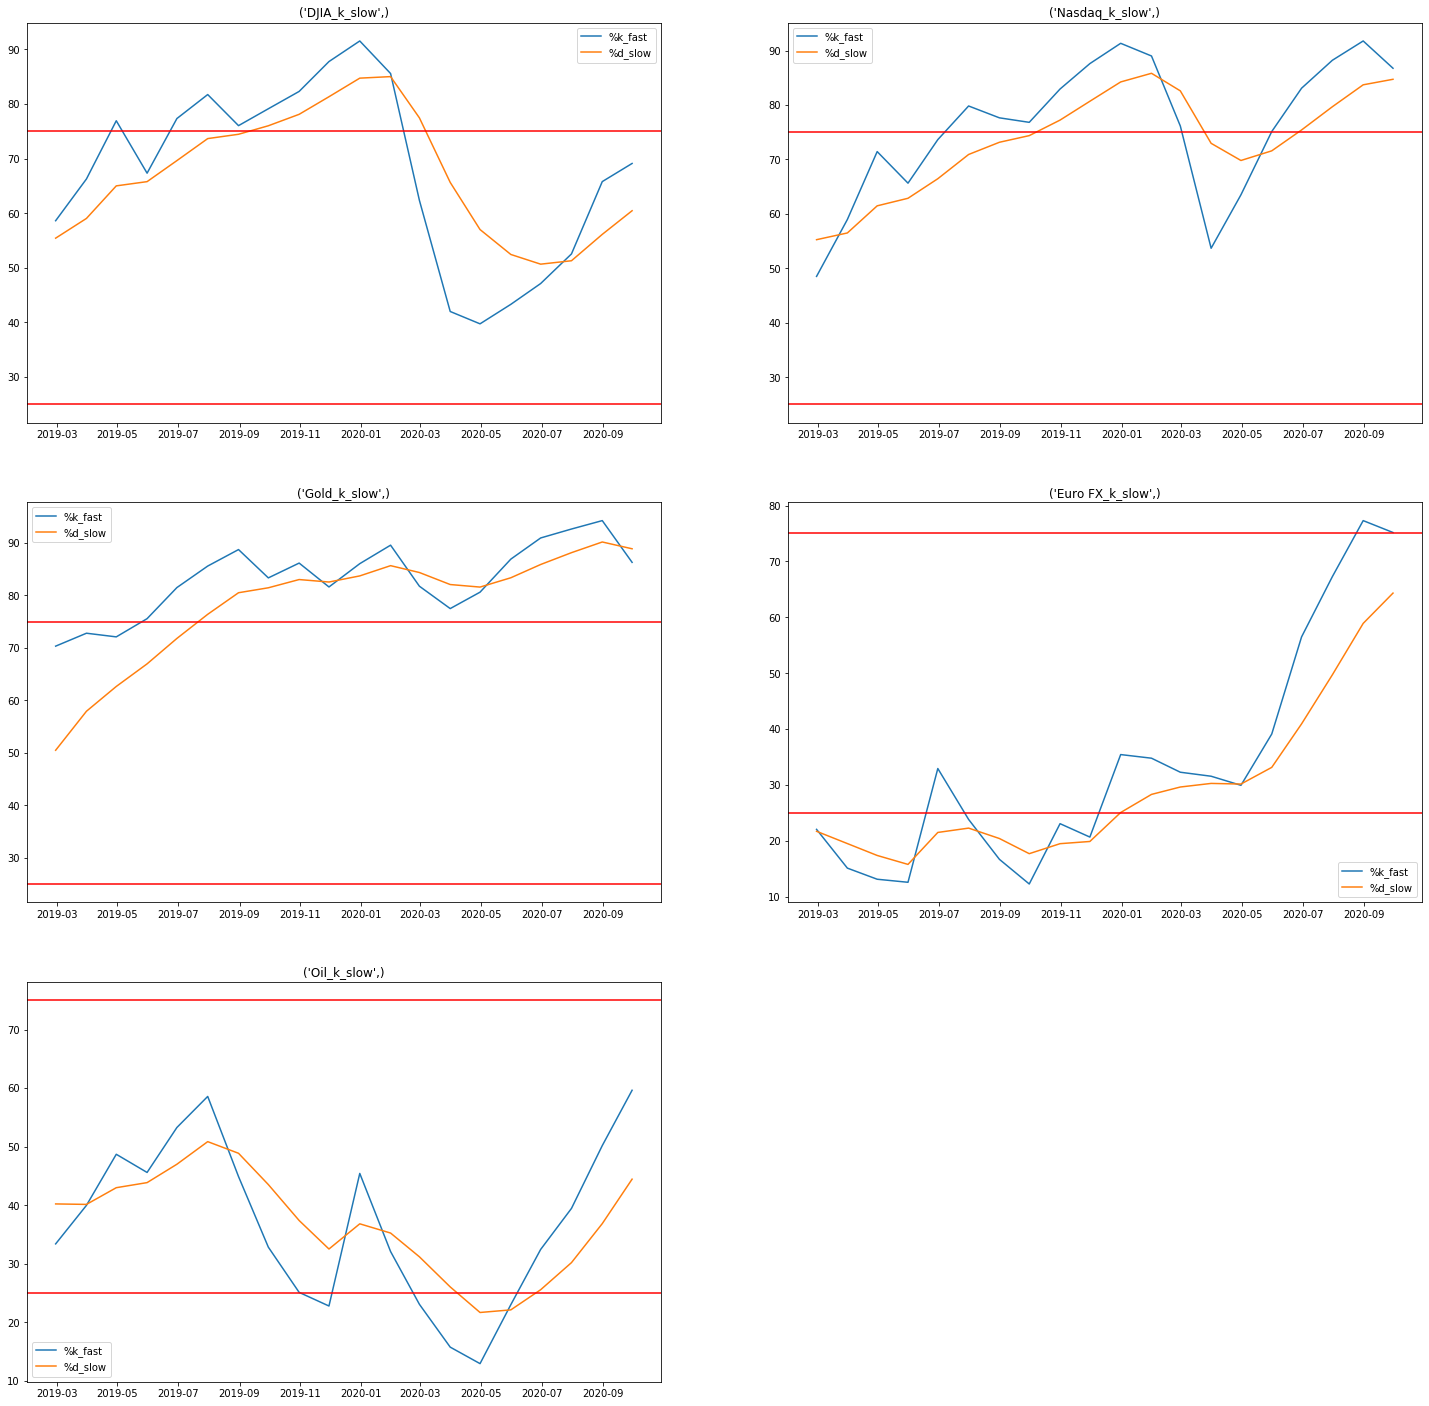

In [5]:
trading.plot_pref_stochastic(k_slow_monthly[-20:],d_slow_monthly[-20:])

### MACD-DEMA

In [6]:
macd_monthly,signal_line_monthly,diff_monthly = trading.macd_dema(close_monthly)

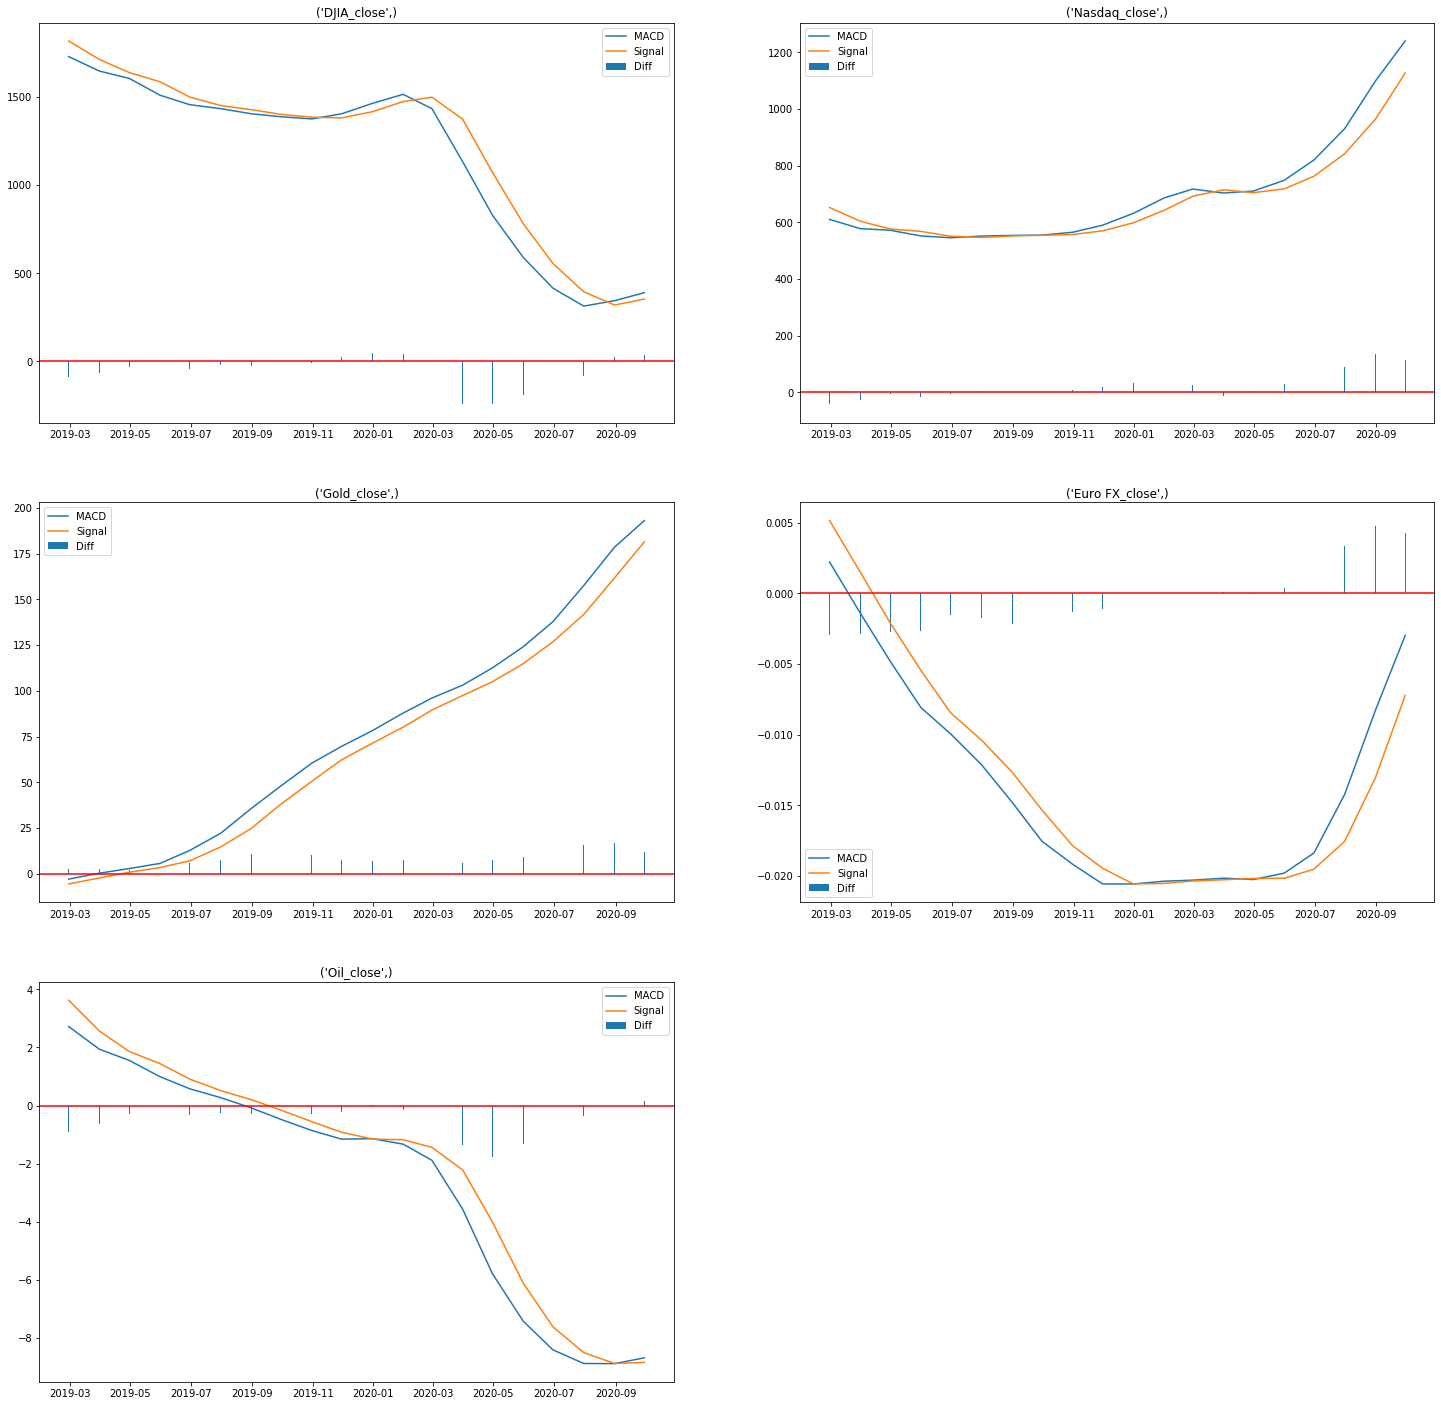

In [7]:
trading.plot_macd(macd_monthly[-20:],signal_line_monthly[-20:],diff_monthly[-20:])

## Weekly

### Preferred Stochastic

In [8]:
k_slow_weekly,d_slow_weekly=trading.preferred_stochastic(close_weekly,high_weekly,low_weekly,column)

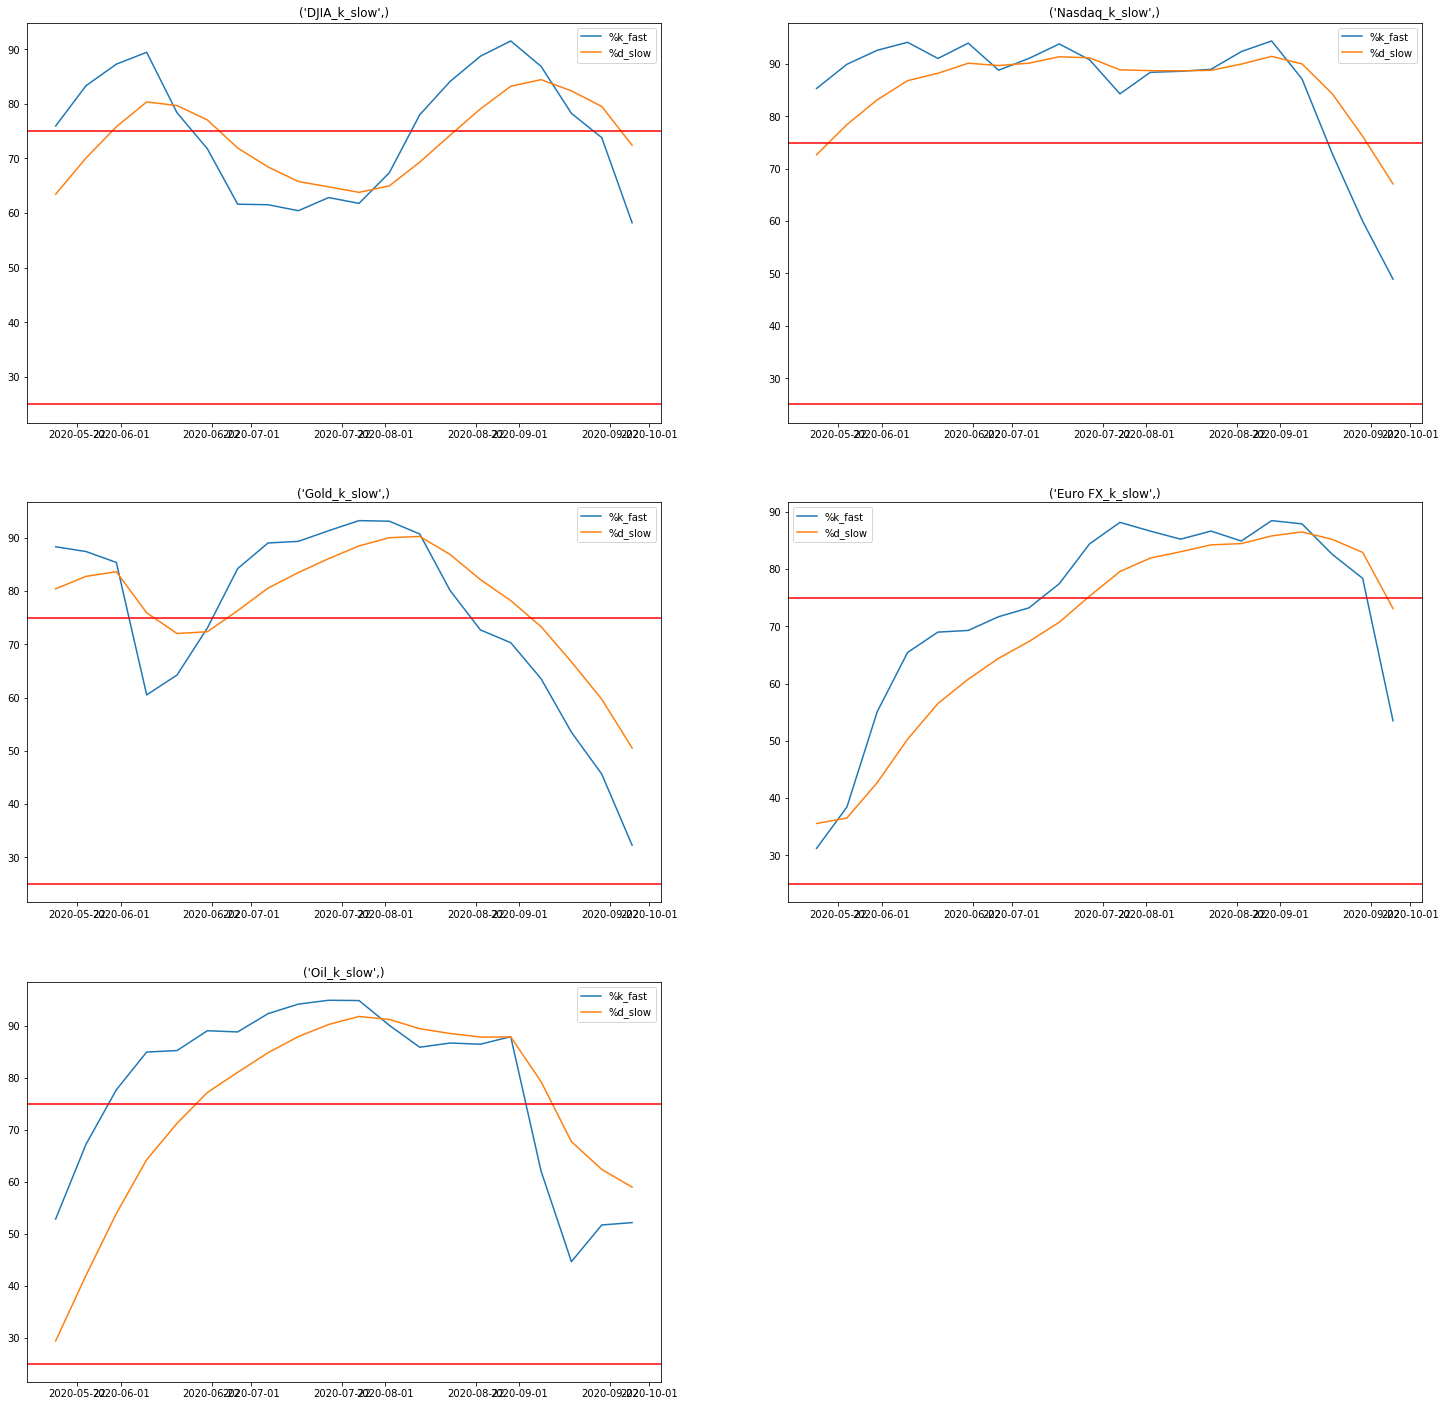

In [9]:
trading.plot_pref_stochastic(k_slow_weekly[-20:],d_slow_weekly[-20:])

### MACD-DEMA

In [10]:
macd_weekly,signal_line_weekly,diff_weekly = trading.macd_dema(close_weekly)

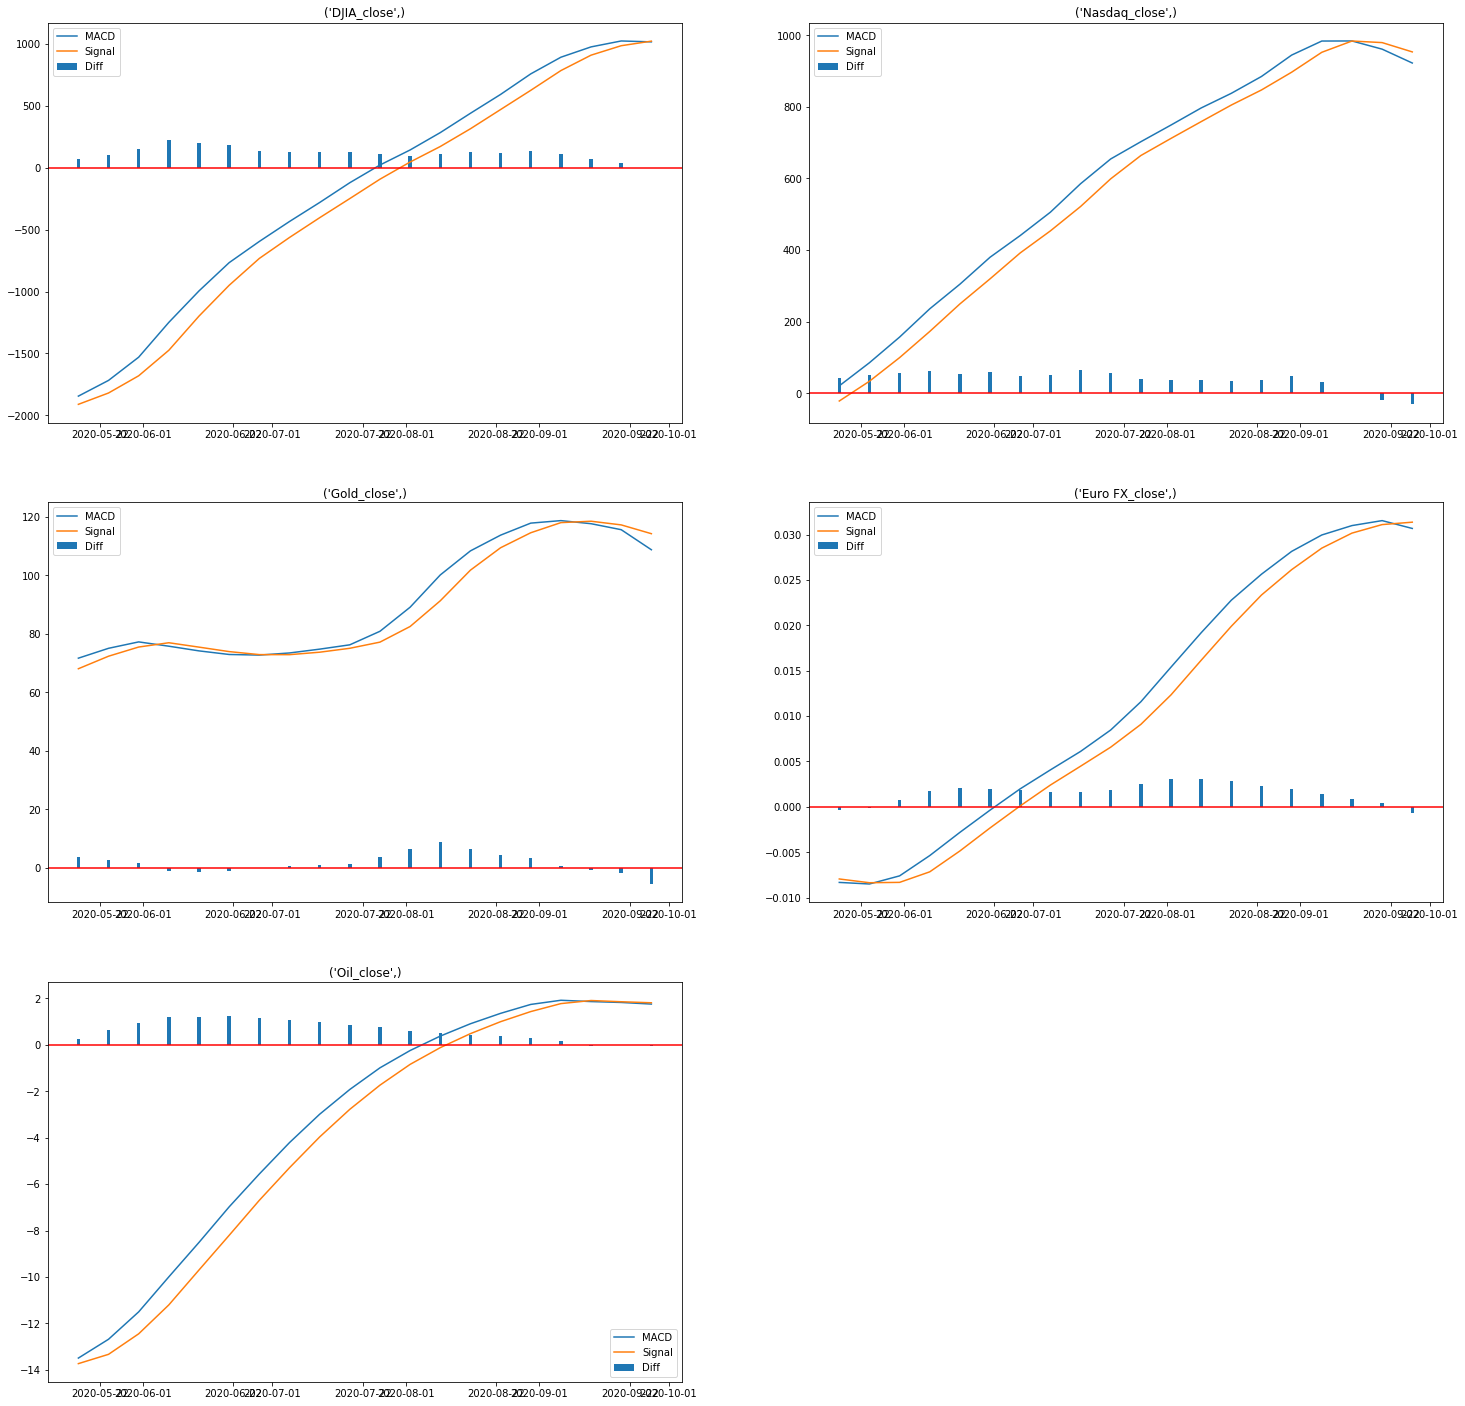

In [11]:
trading.plot_macd(macd_weekly[-20:],signal_line_weekly[-20:],diff_weekly[-20:])

## Daily

### Preferred Stochastic

In [12]:
k_slow_daily,d_slow_daily=trading.preferred_stochastic(close_daily,high_daily,low_daily,column)

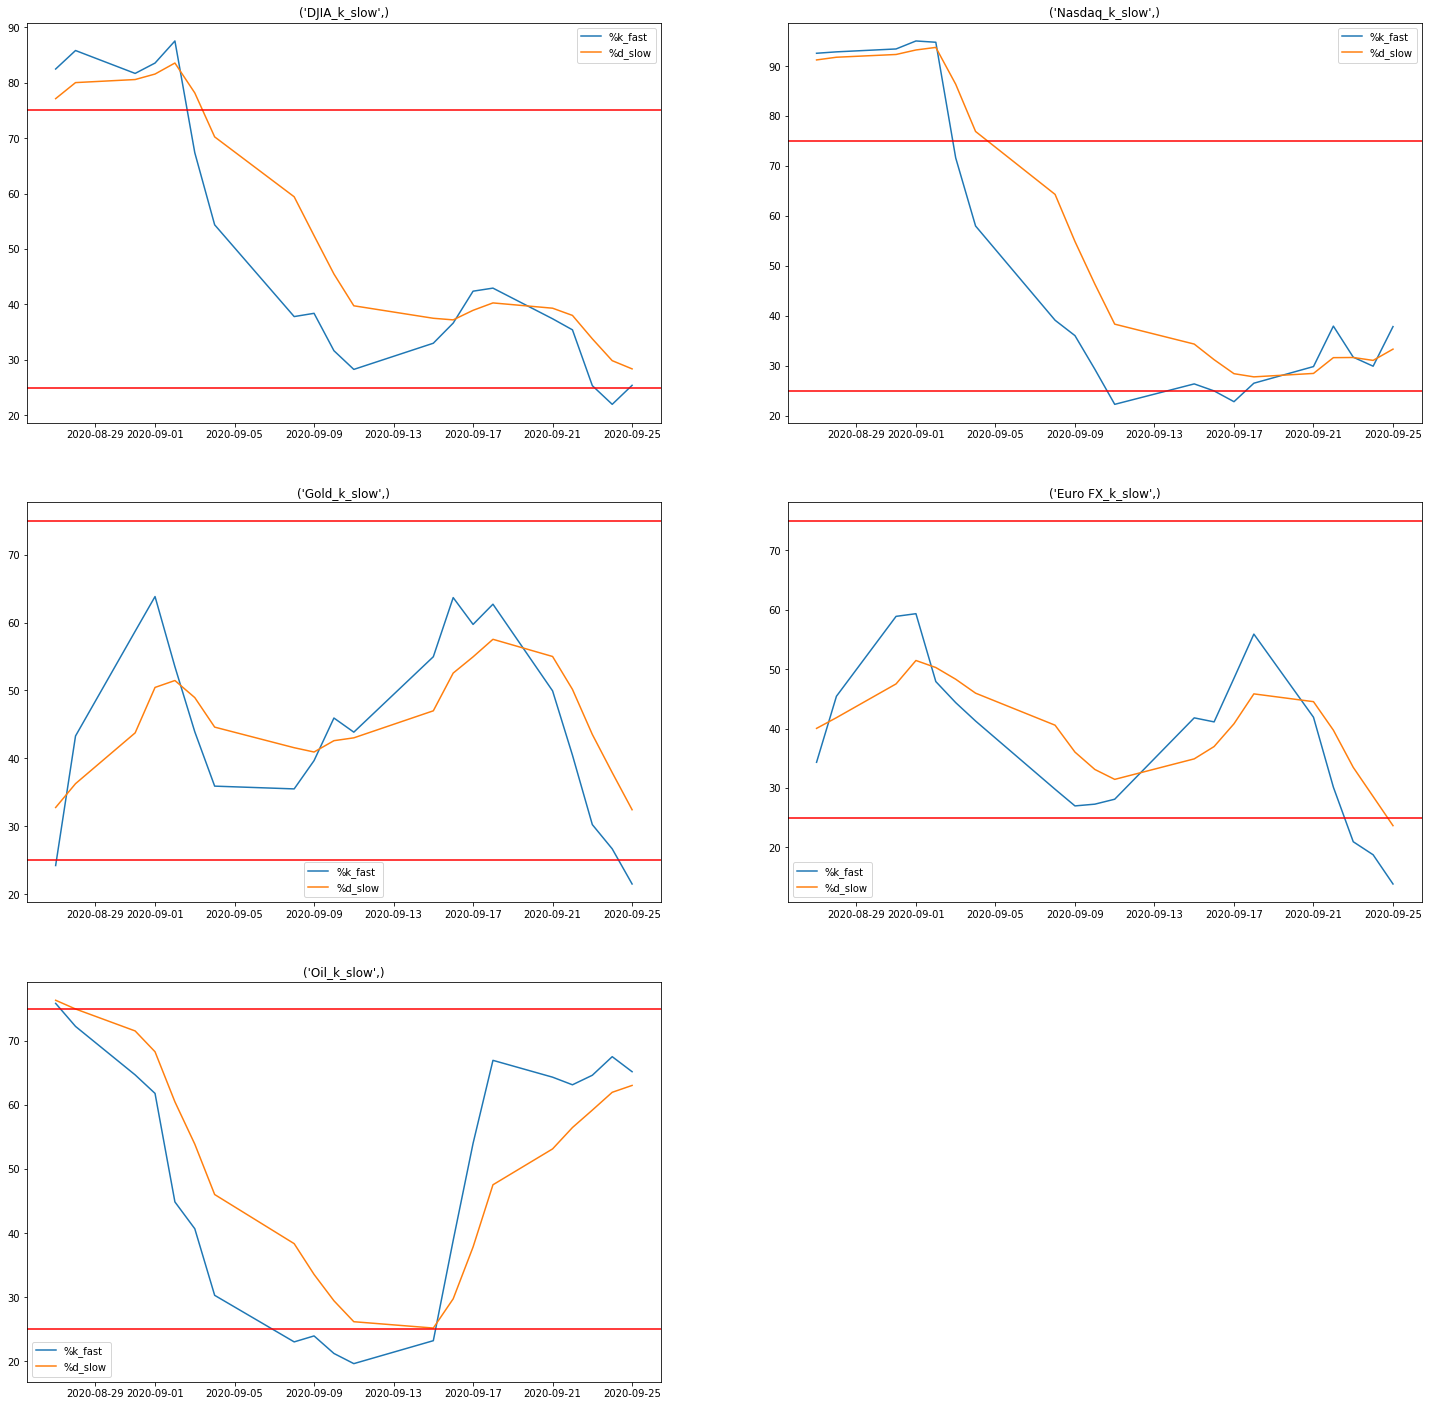

In [13]:
trading.plot_pref_stochastic(k_slow_daily[-20:],d_slow_daily[-20:])

### MACD-DEMA

In [14]:
macd_daily,signal_line_daily,diff_daily = trading.macd_dema(close_daily)

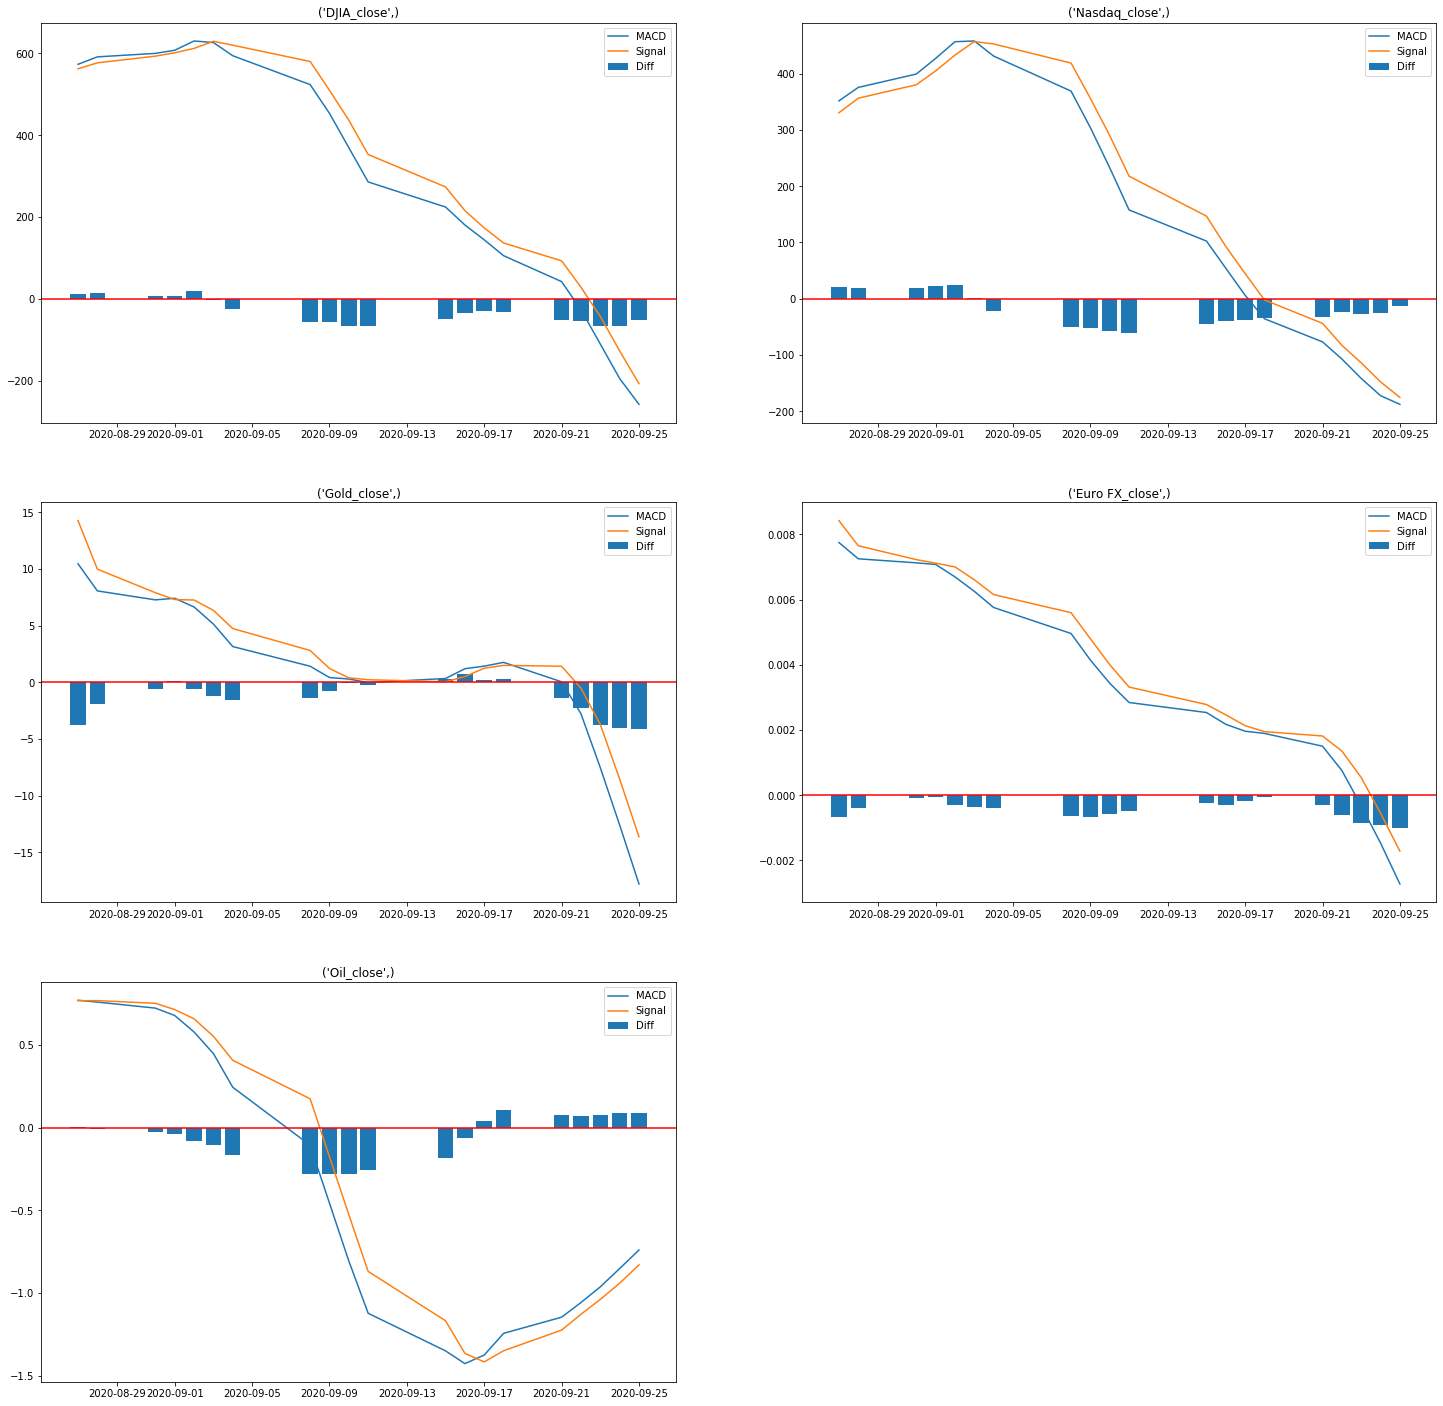

In [15]:
trading.plot_macd(macd_daily[-20:],signal_line_daily[-20:],diff_daily[-20:])

# OVERBOUGHT/OVERSOLD ANALISYS

## Monthly

In [16]:
detrended_monthly = trading.detrended_oscillator(close_monthly)

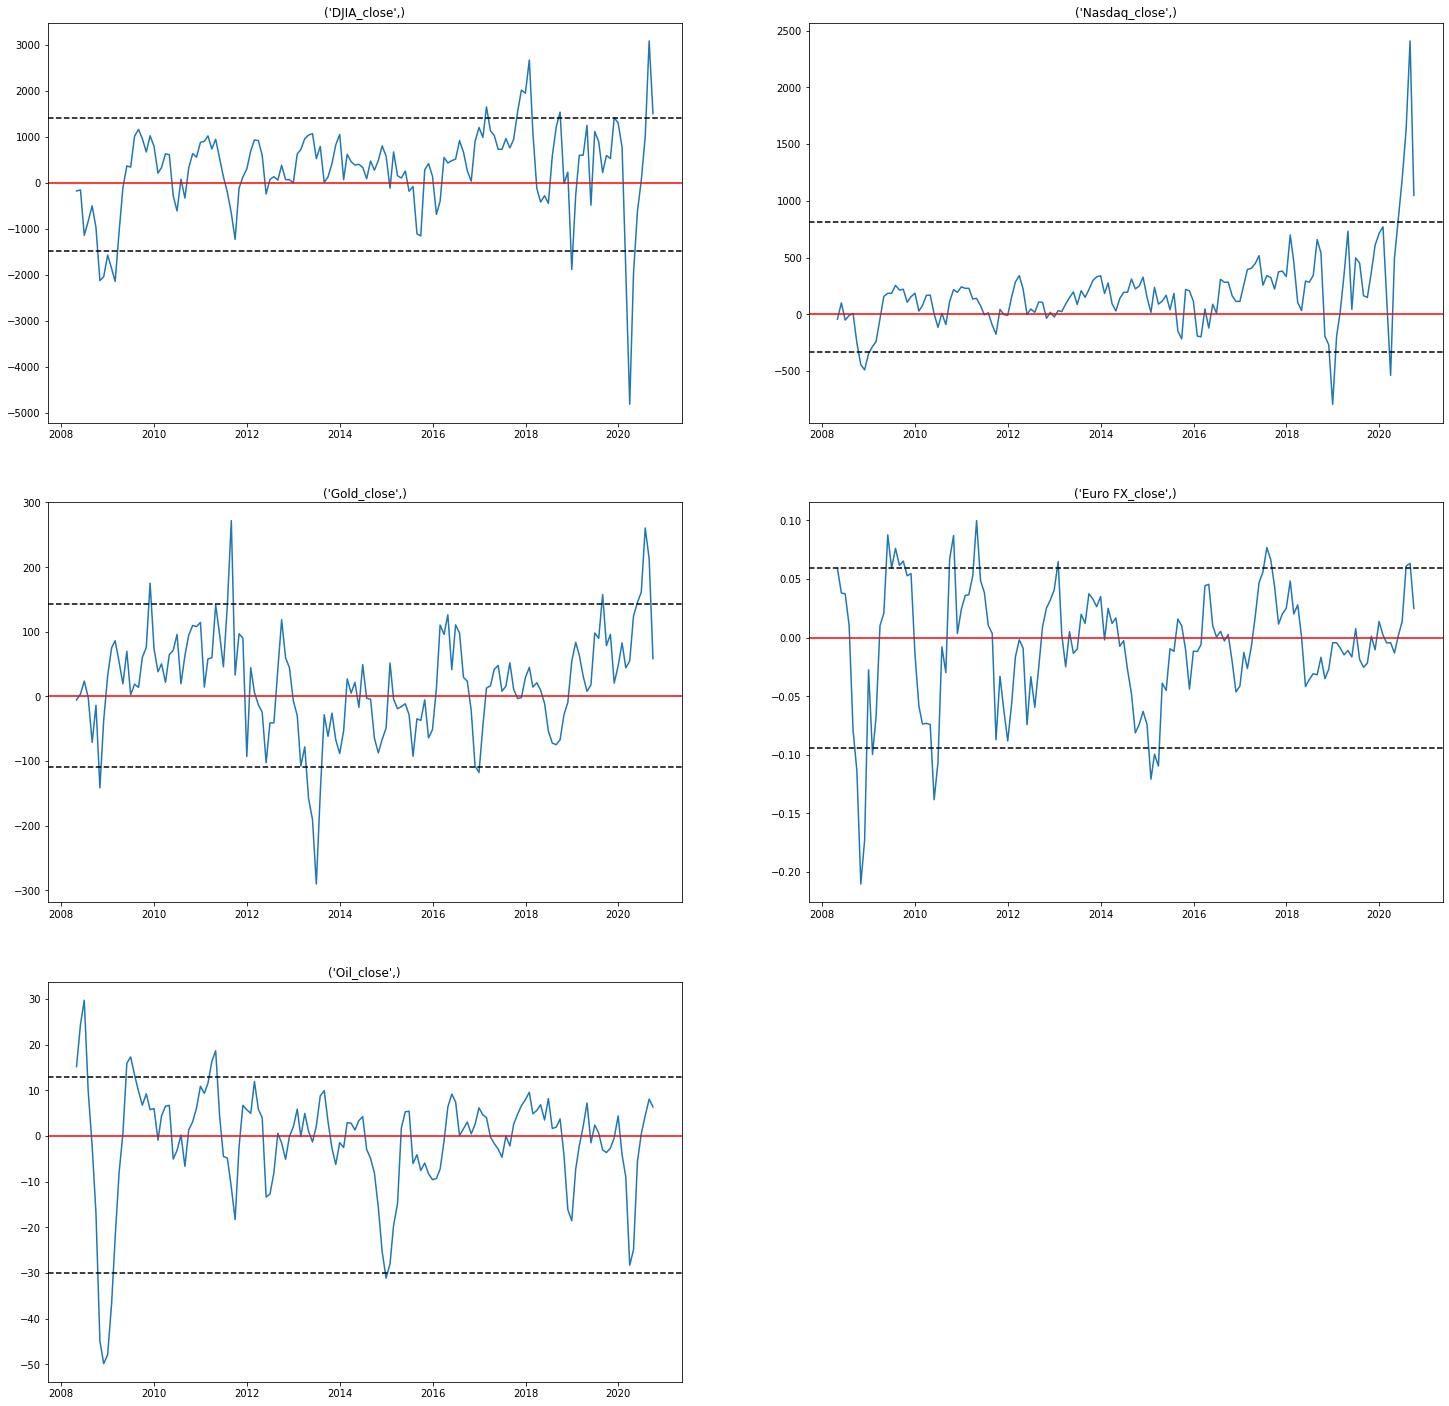

In [17]:
trading.plot_detrended_oscillator(detrended_monthly[-200:],detrended_monthly[-200:])

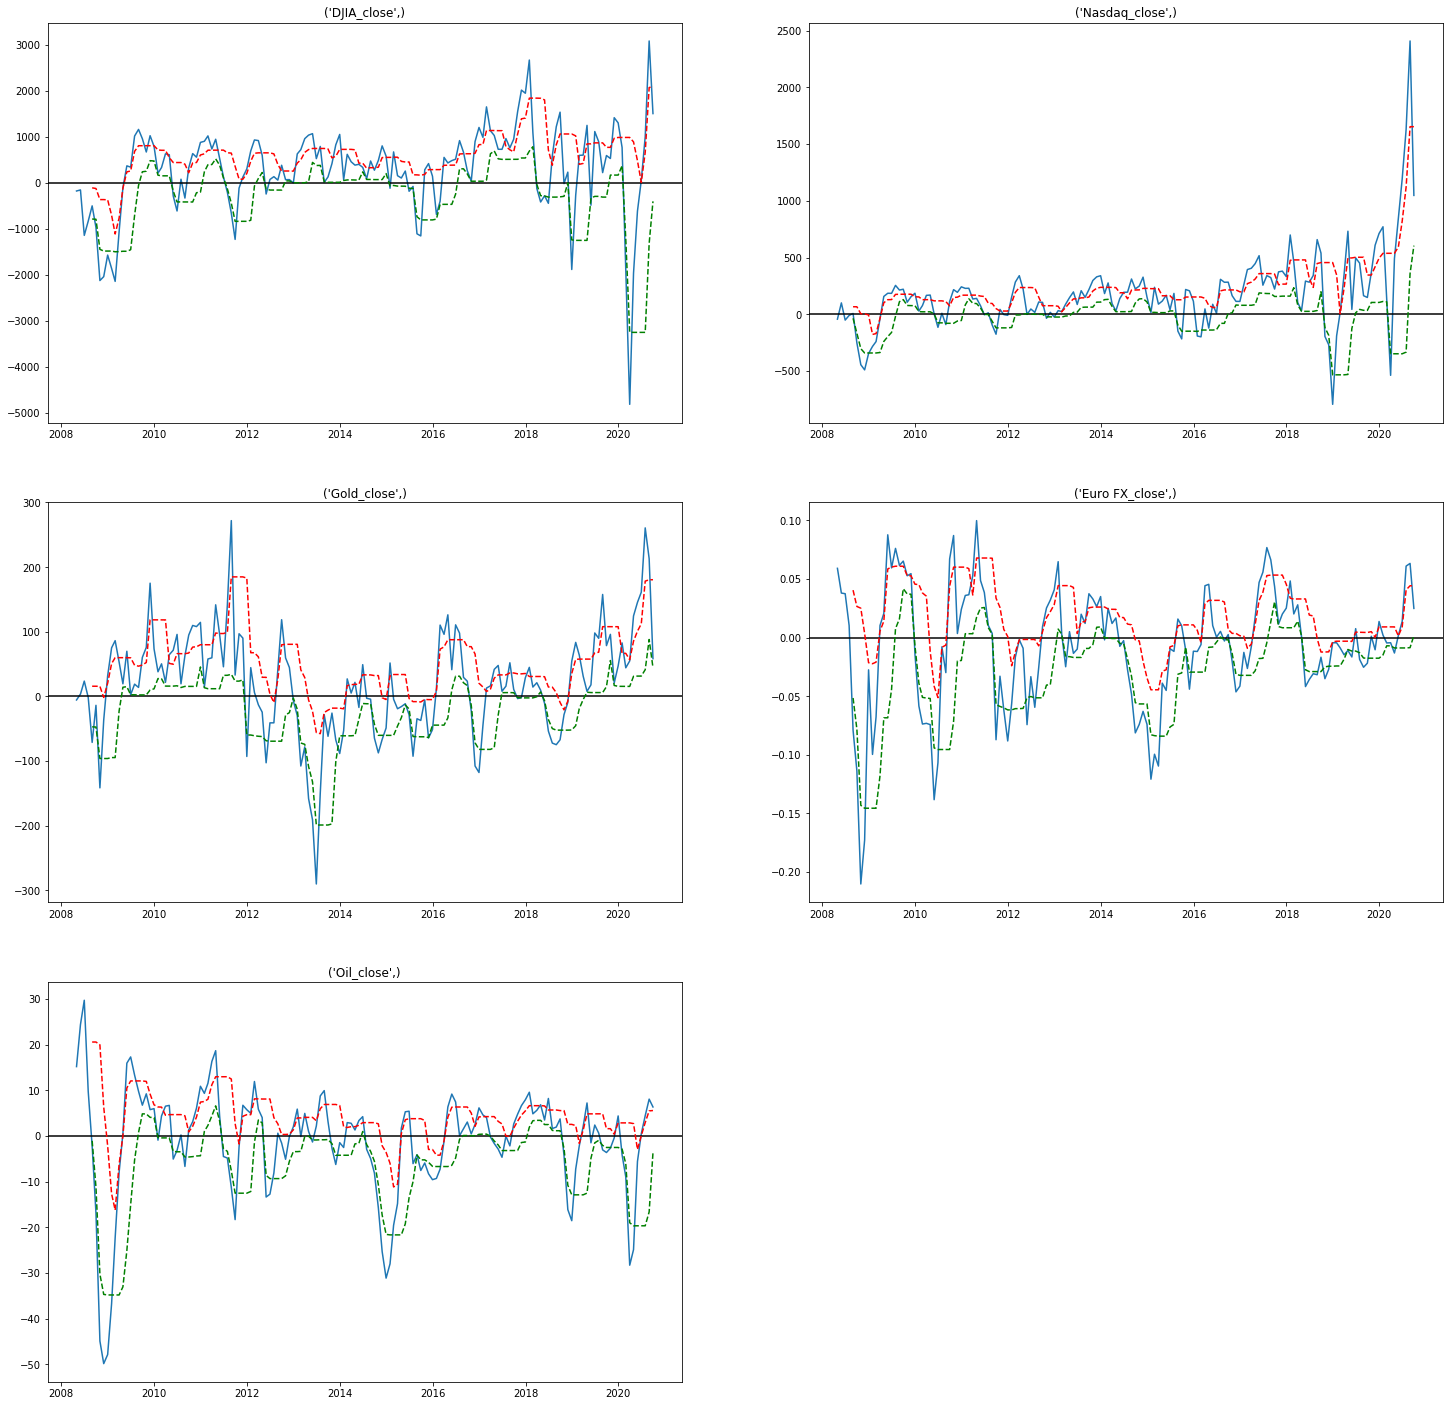

In [18]:
trading.plot_detrended_oscillator2(detrended_monthly[-200:],detrended_monthly[-200:],p=5)

## Weekly

In [19]:
detrended_weekly = trading.detrended_oscillator(close_weekly)

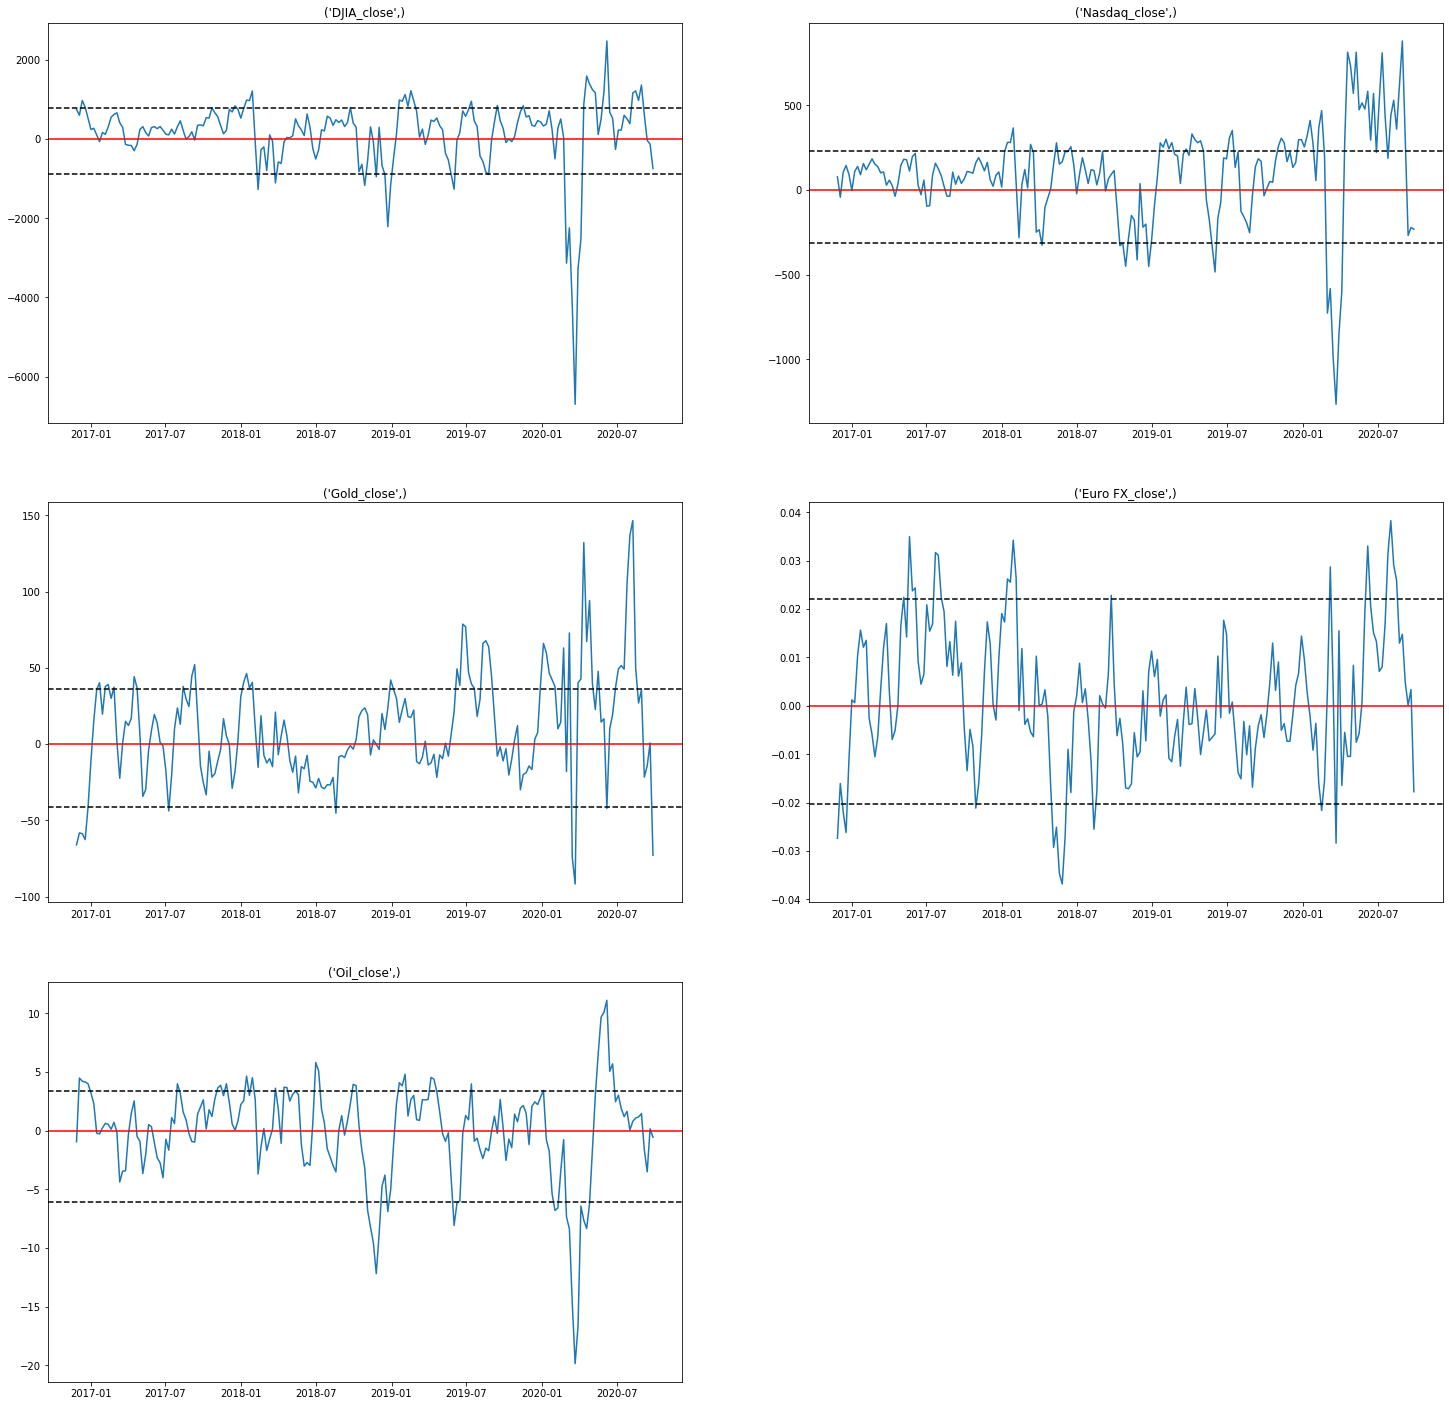

In [20]:
trading.plot_detrended_oscillator(detrended_weekly[-200:],detrended_weekly[-200:-60])

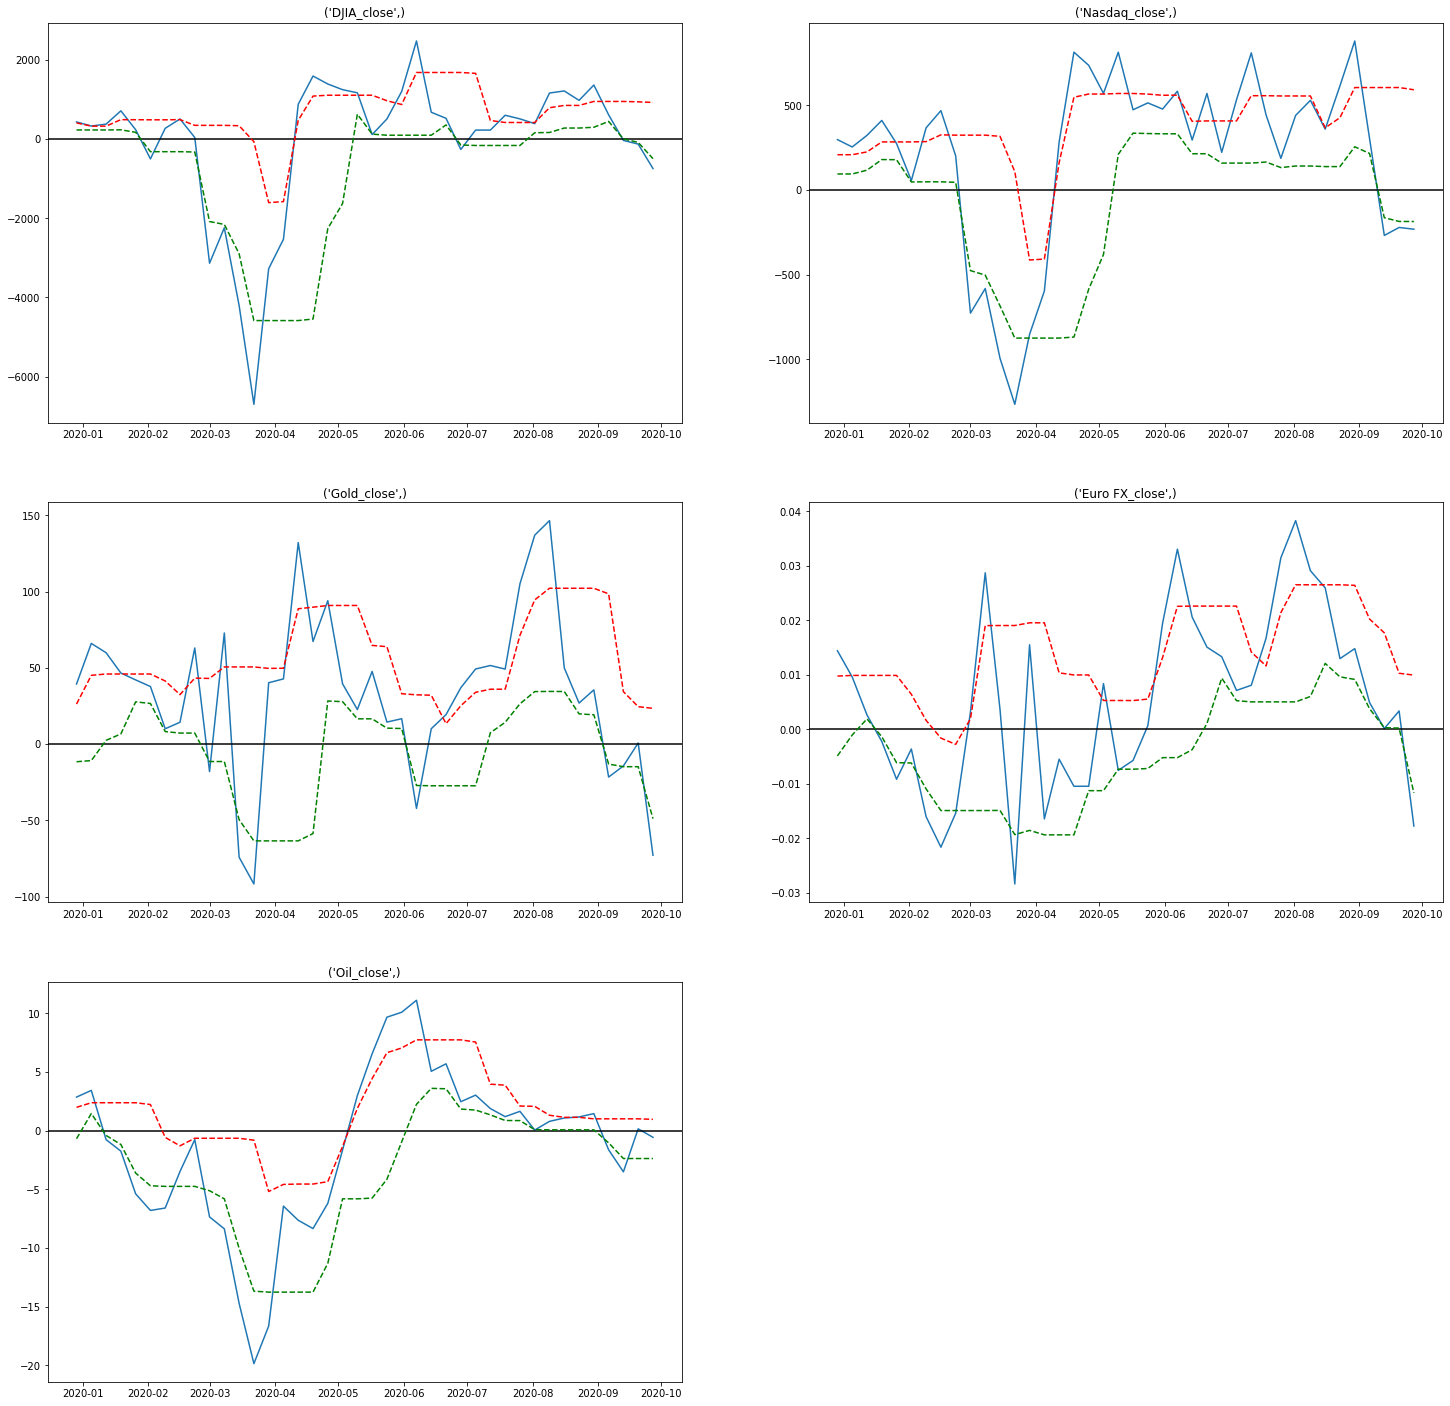

In [21]:
trading.plot_detrended_oscillator2(detrended_weekly[-40:],detrended_weekly[-200:],p=5)

## Daily

In [22]:
detrended_daily = trading.detrended_oscillator(close_daily)

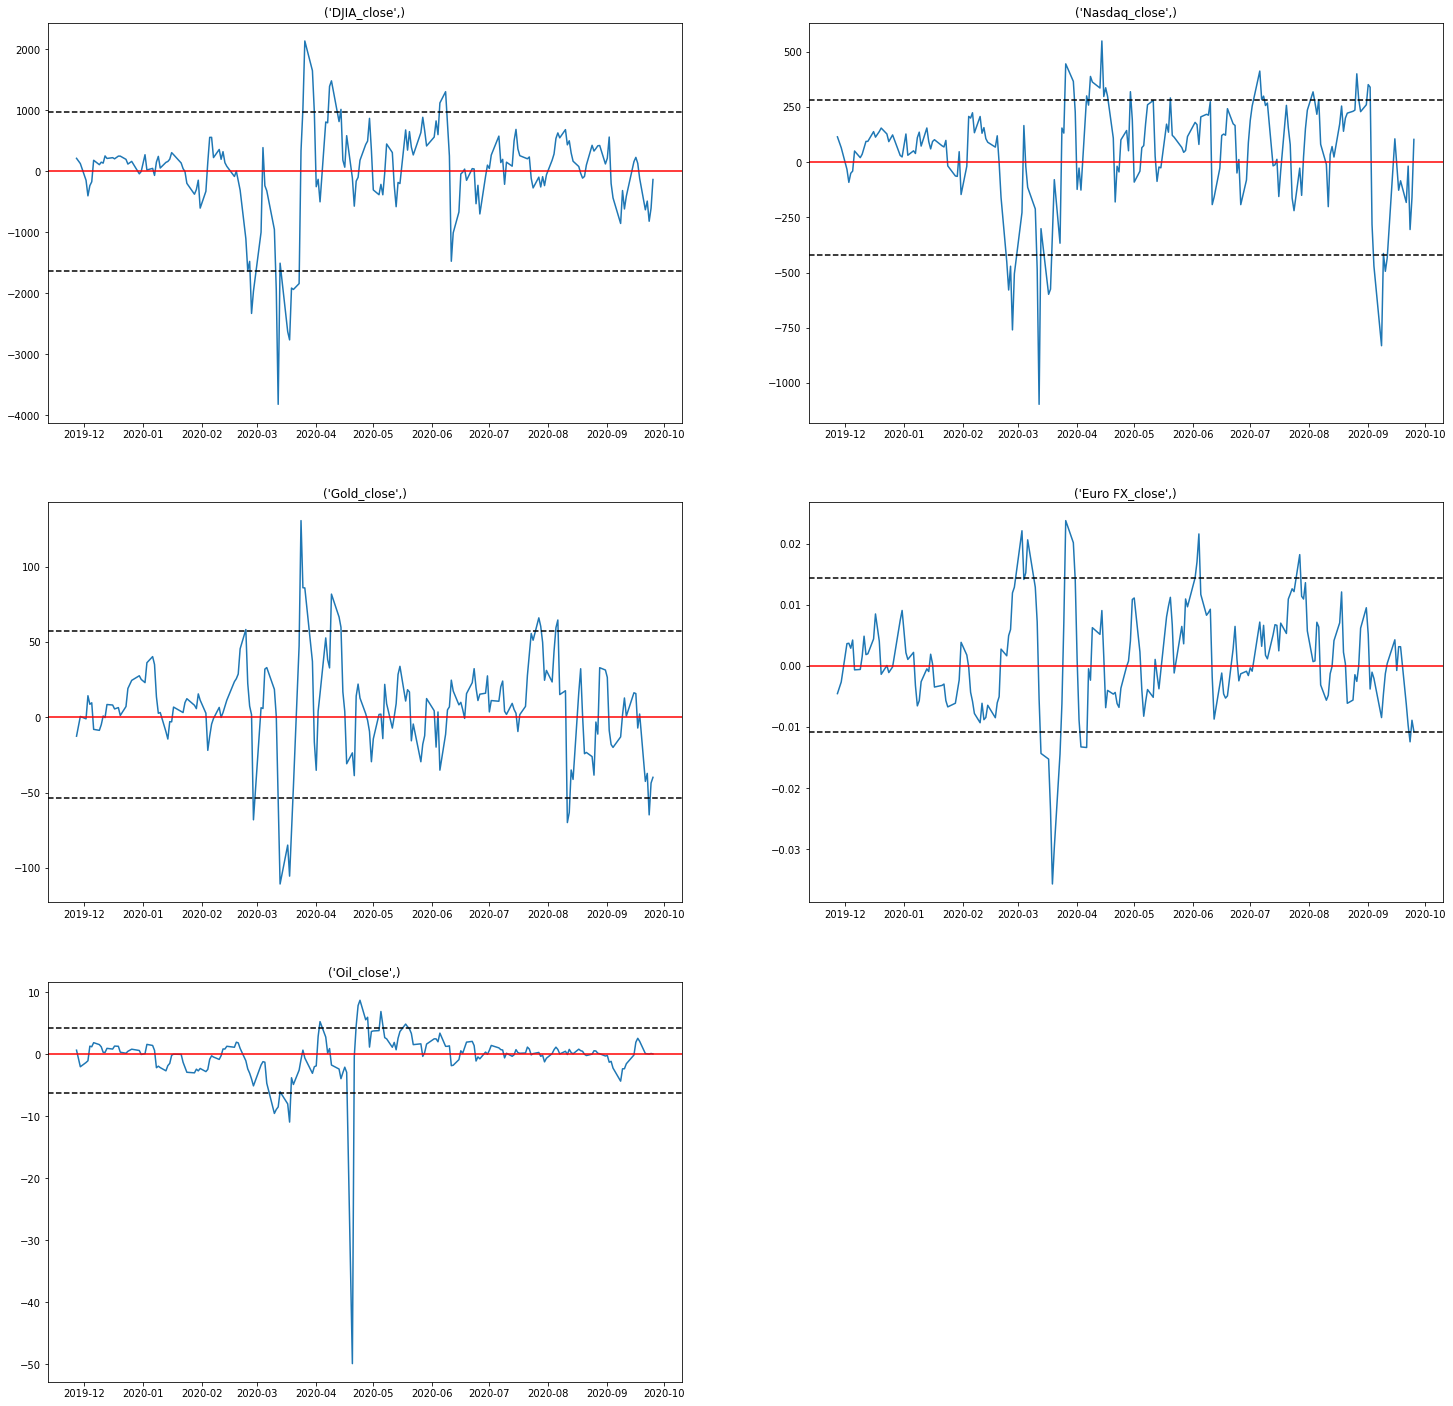

In [23]:
trading.plot_detrended_oscillator(detrended_daily[-200:],detrended_daily[-200:])

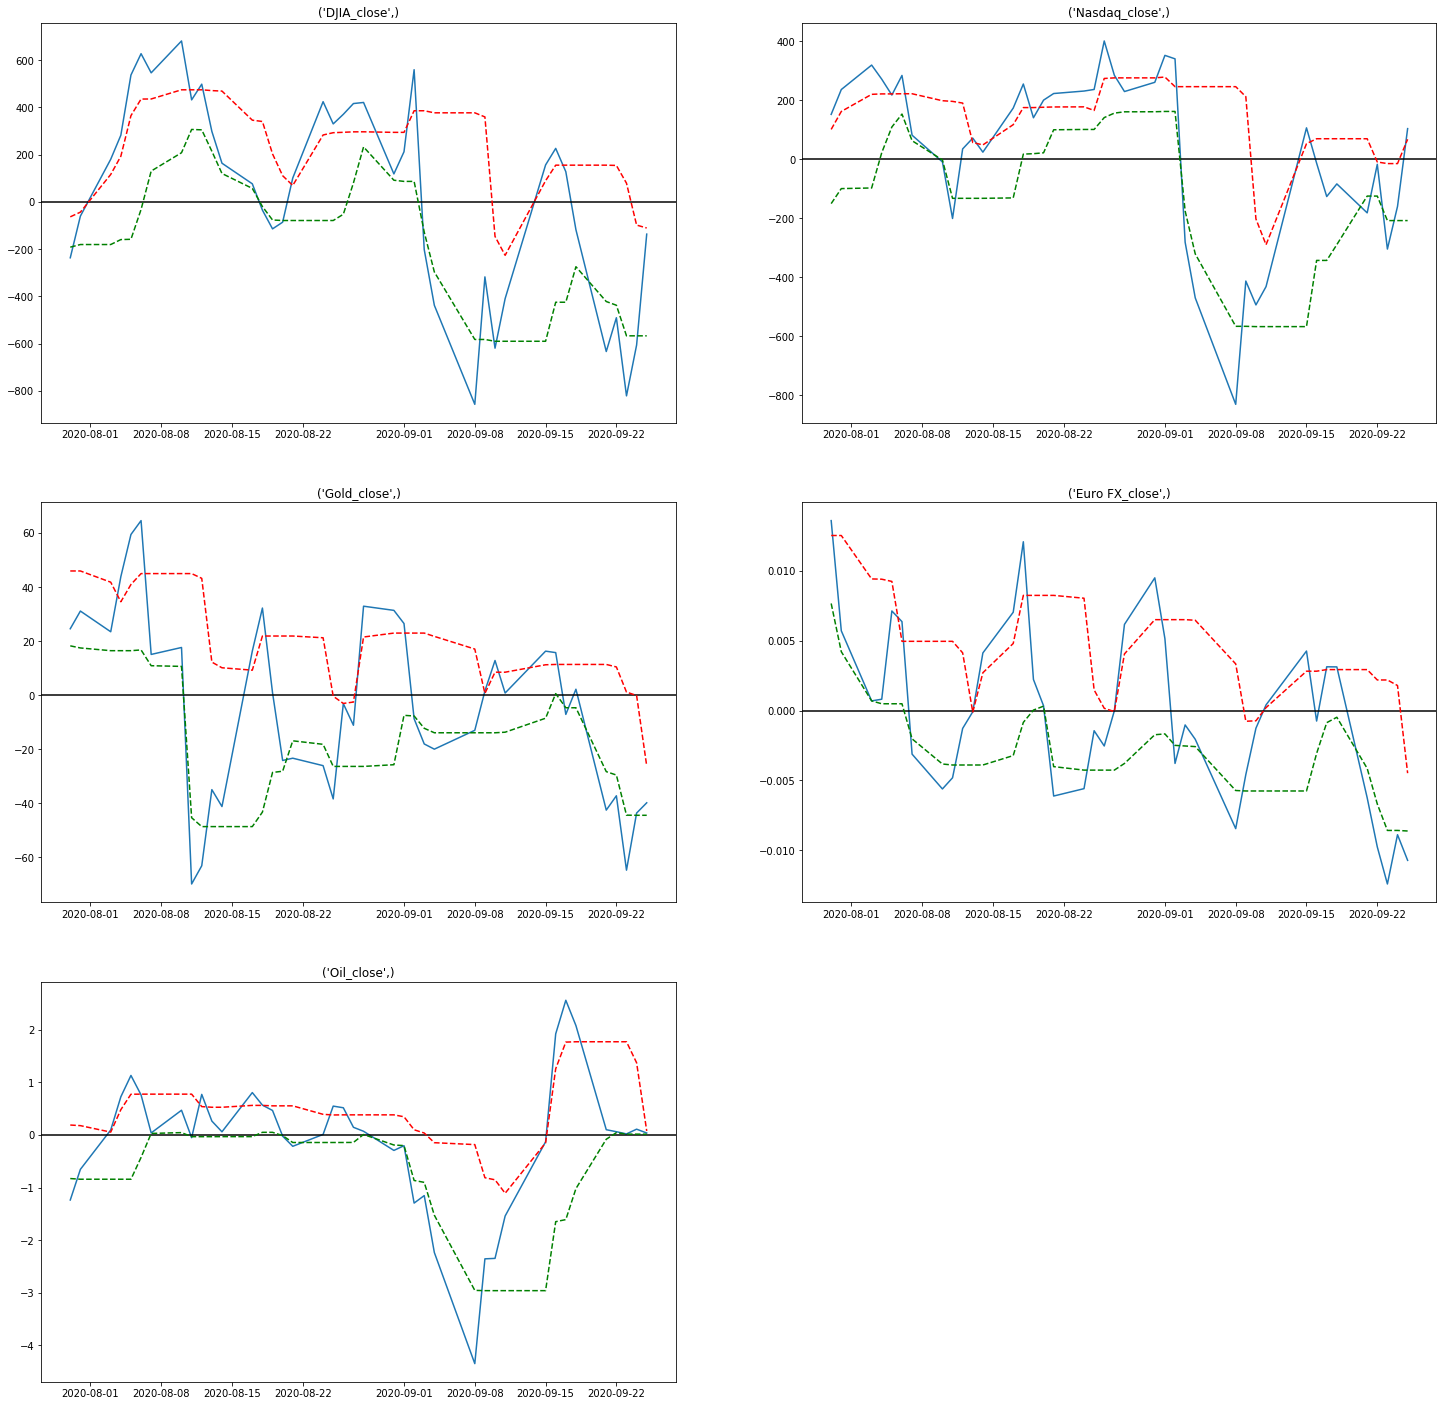

In [24]:
trading.plot_detrended_oscillator2(detrended_daily[-40:],detrended_daily[-200:],p=5)

In [25]:
detrended_daily[-41:-30]

DJIA_close Nasdaq_close Gold_close Euro FX_close Oil_close
Date                                                                  
2020-07-29  -89.428571    23.964286  49.757143      0.010943 -0.177143
2020-07-30 -236.285714   151.857143  24.600000      0.013614 -1.235714
2020-07-31  -59.857143   236.035714  31.142857      0.005721 -0.652857
2020-08-03  180.714286   318.928571  23.485714      0.000700  0.095714
2020-08-04  282.428571   271.107143  43.871429      0.000821  0.727143
2020-08-05  537.285714   217.357143  59.471429      0.007143  1.132857
2020-08-06  627.571429   283.821429  64.600000      0.006379  0.762857
2020-08-07  546.571429    81.250000  15.100000     -0.003114  0.040000
2020-08-10  681.428571    -9.214286  17.671429     -0.005607  0.471429
2020-08-11  432.142857  -201.000000 -69.814286     -0.004807 -0.050000
2020-08-12  498.571429    34.821429 -63.071429     -0.001271  0.772857

In [26]:
close_daily

DJIA_close Nasdaq_close Gold_close Euro FX_close Oil_close
Date                                                                 
2007-10-01    14249.0      2135.25      747.2       1.42600     80.24
2007-10-02    14205.0      2135.50      729.8       1.41750     80.05
2007-10-03    14150.0      2120.75      729.3       1.41260     79.94
2007-10-04    14139.0      2123.00      737.8       1.41370     81.44
2007-10-05    14254.0      2170.75      741.3       1.41580     81.22
...               ...          ...        ...           ...       ...
2020-09-21    26959.0     10989.00     1902.1       1.17755     39.31
2020-09-22    27048.0     11149.50     1899.3       1.17260     39.60
2020-09-23    26588.0     10829.00     1860.5       1.16775     39.93
2020-09-24    26619.0     10891.75     1868.9       1.16855     40.31
2020-09-25    26947.0     11136.50     1857.8       1.16415     40.25

[3135 rows x 5 columns]

# TREND MOMENTUM AND TREND REVERSION

## Monthly

### TRI

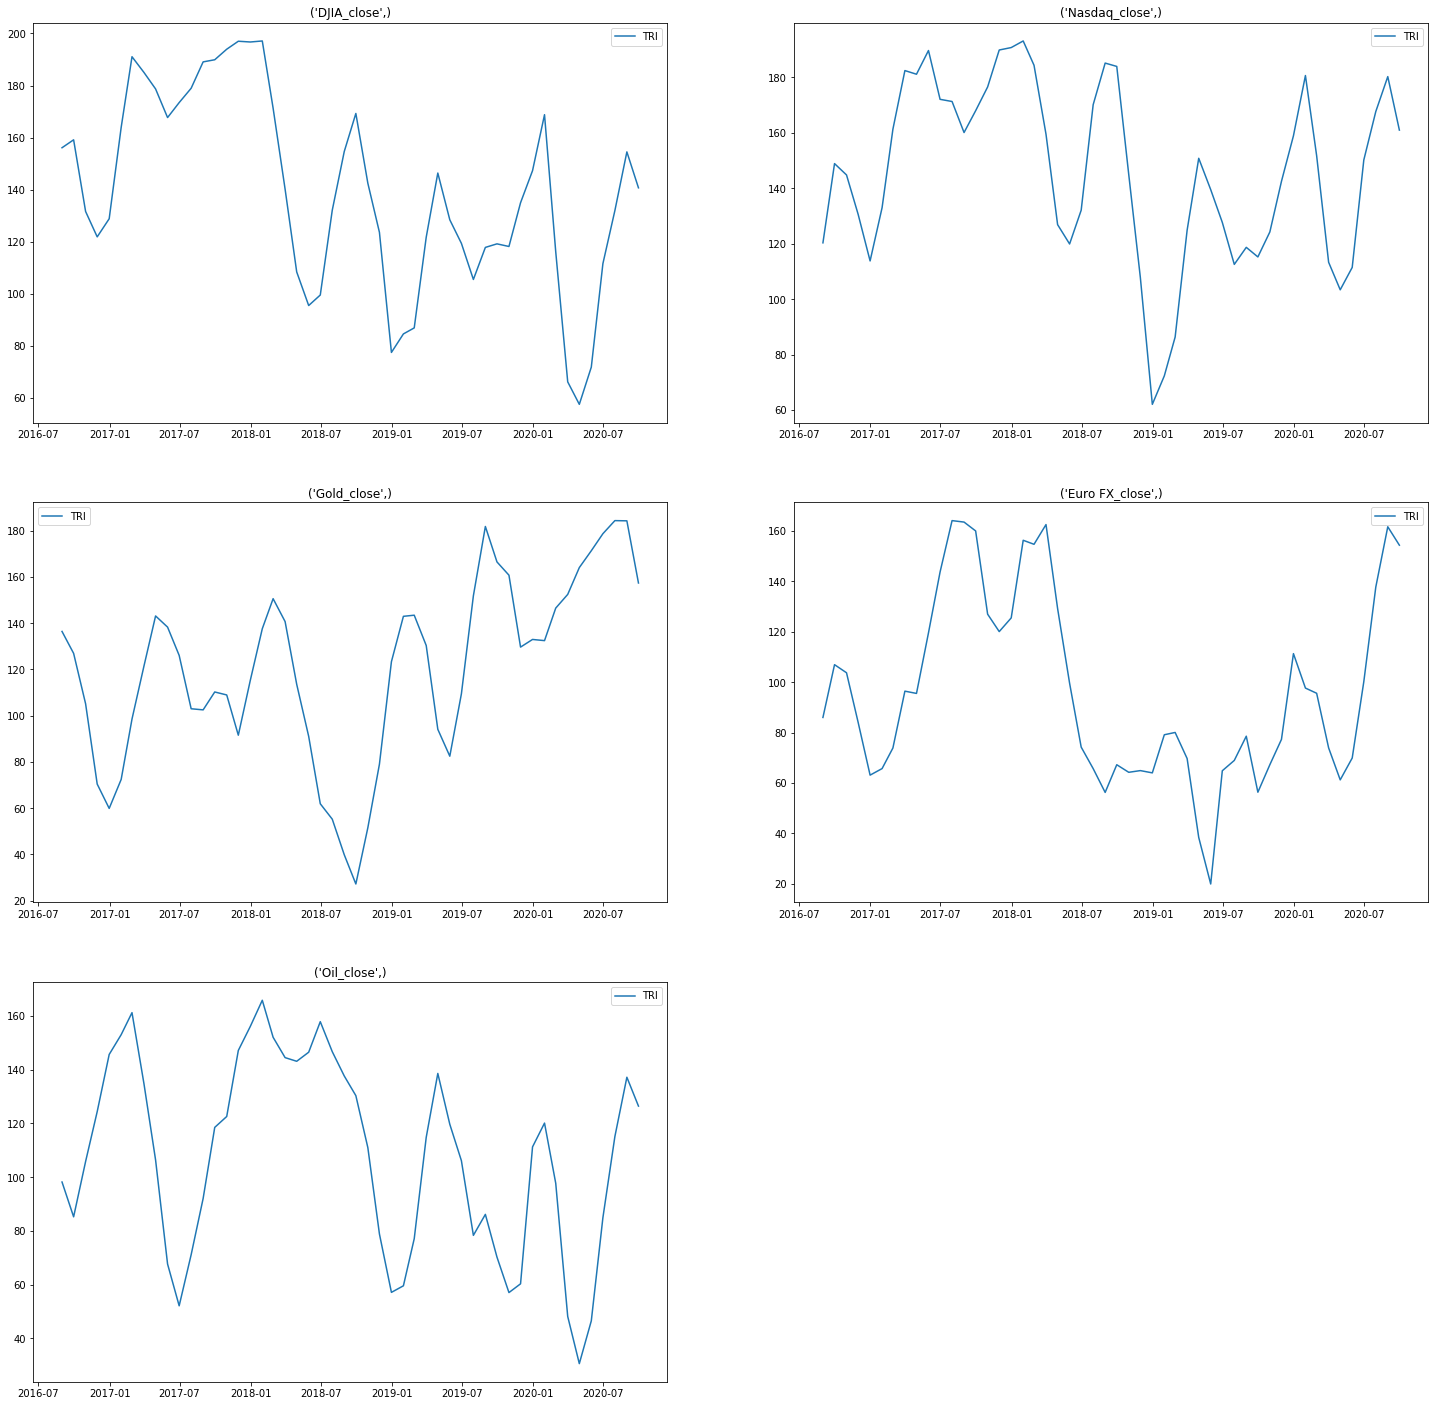

In [27]:
TRI_monthly= trading.TRI(close_monthly)
trading.plot_TRI(TRI_monthly[-50:])

### VHF

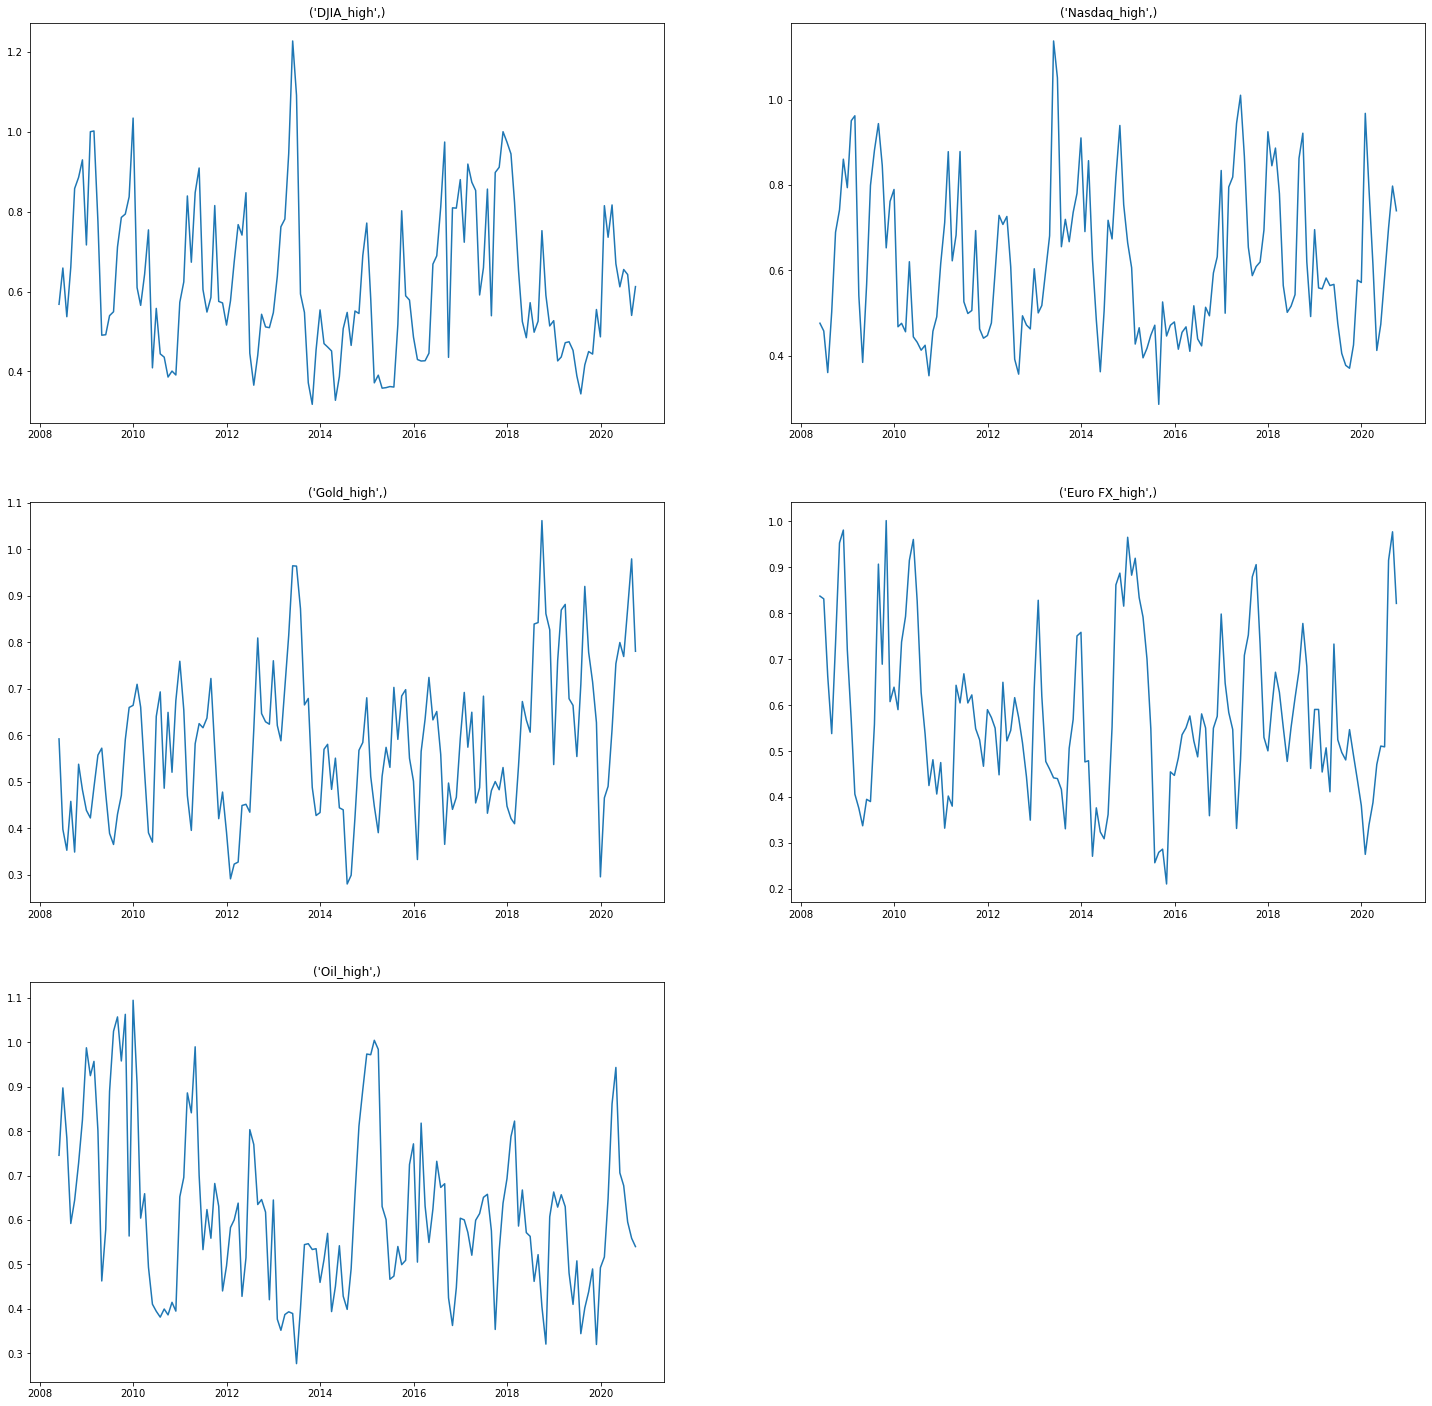

In [28]:
VHF_monthly = trading.VHF(close_monthly,high_monthly,low_monthly)
trading.plot_VHF(VHF_monthly[-200:])

## Weekly

### TRI

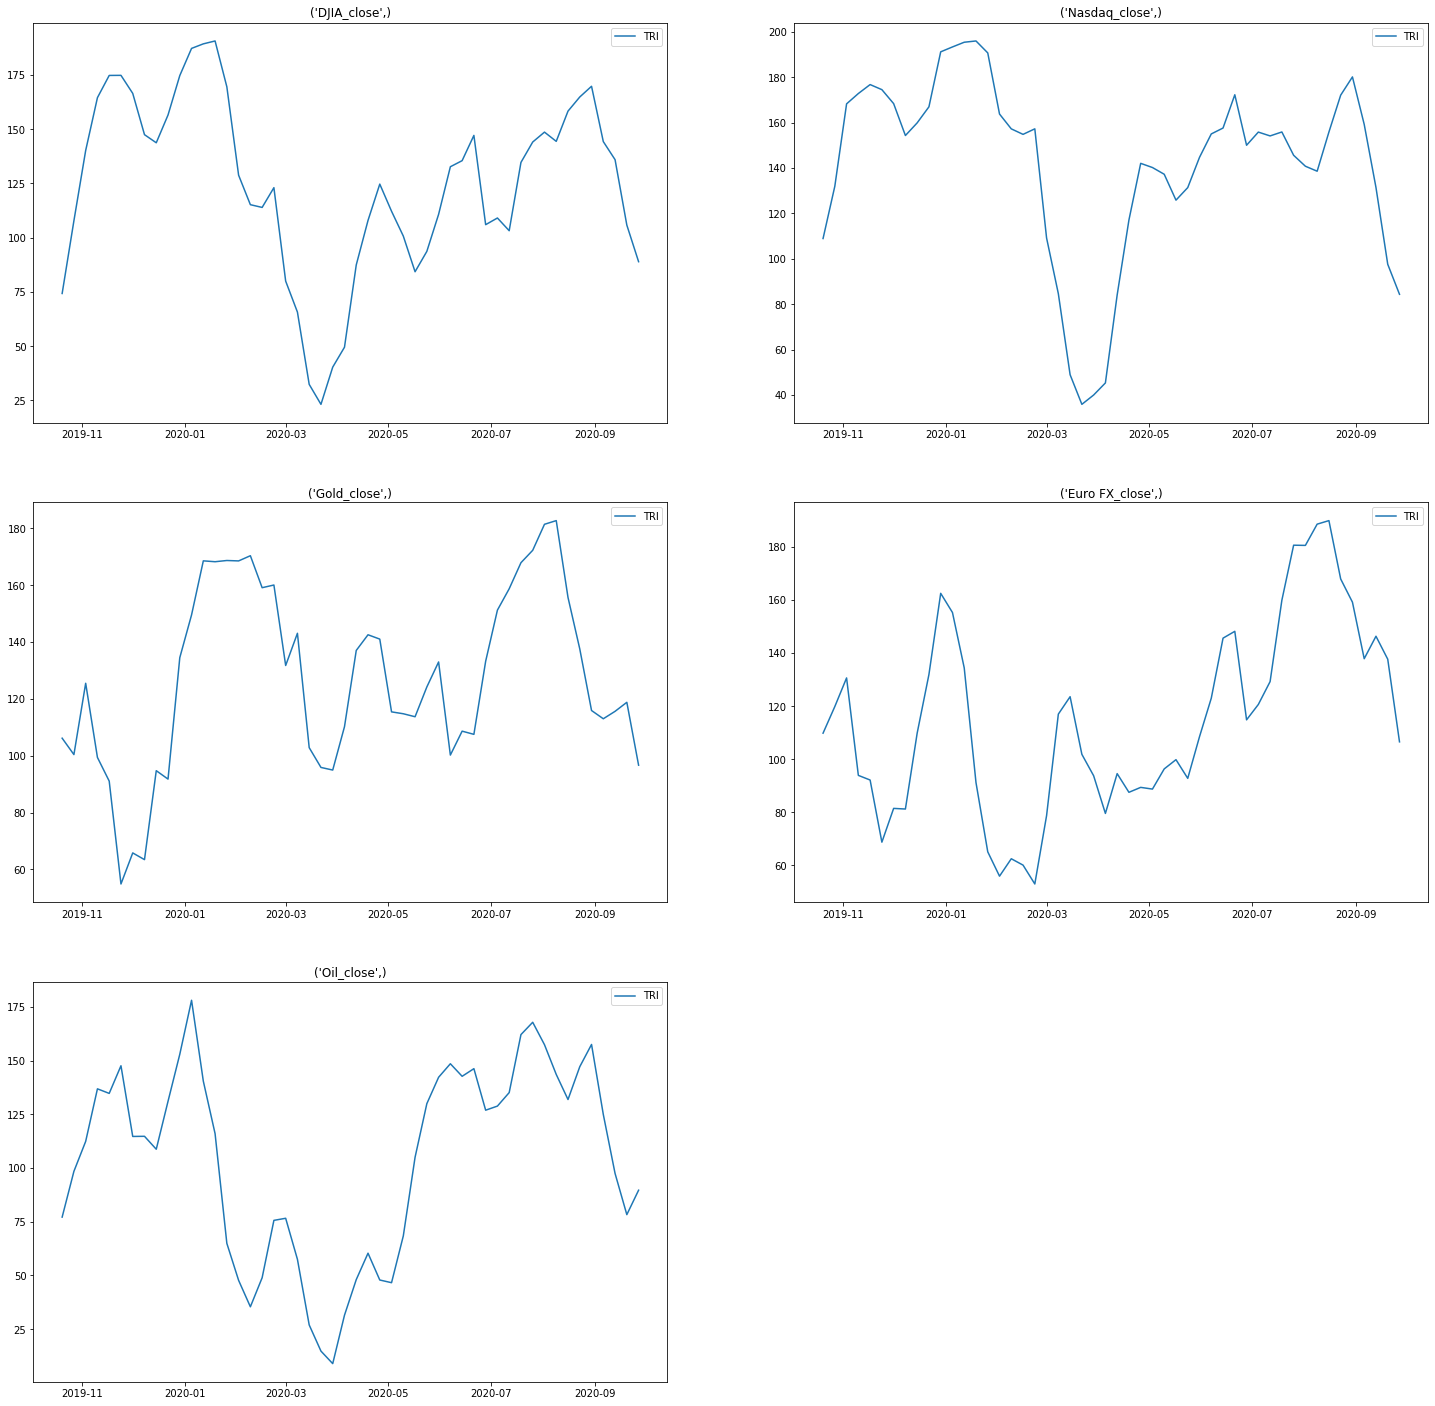

In [29]:
TRI_weekly= trading.TRI(close_weekly)
trading.plot_TRI(TRI_weekly[-50:])

### VHF

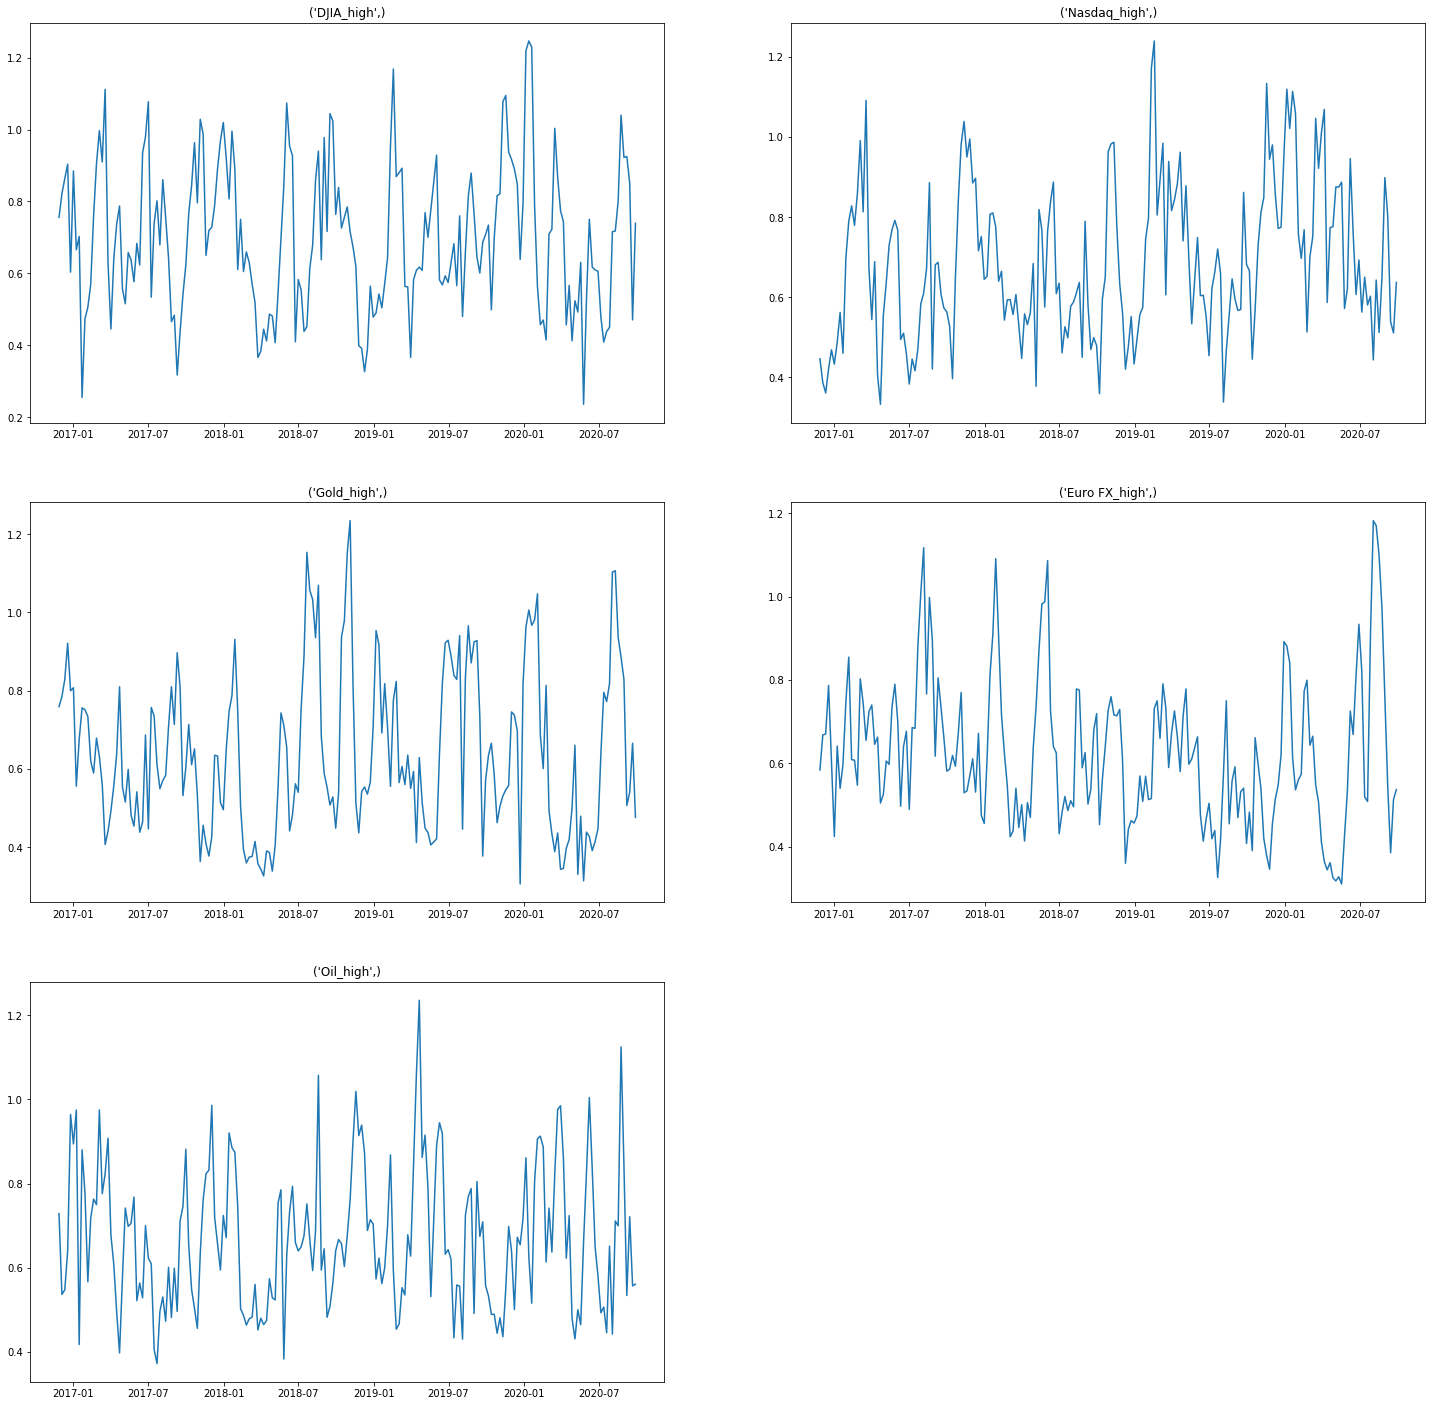

In [30]:
VHF_weekly = trading.VHF(close_weekly,high_weekly,low_weekly)
trading.plot_VHF(VHF_weekly[-200:])

## Daily

### TRI

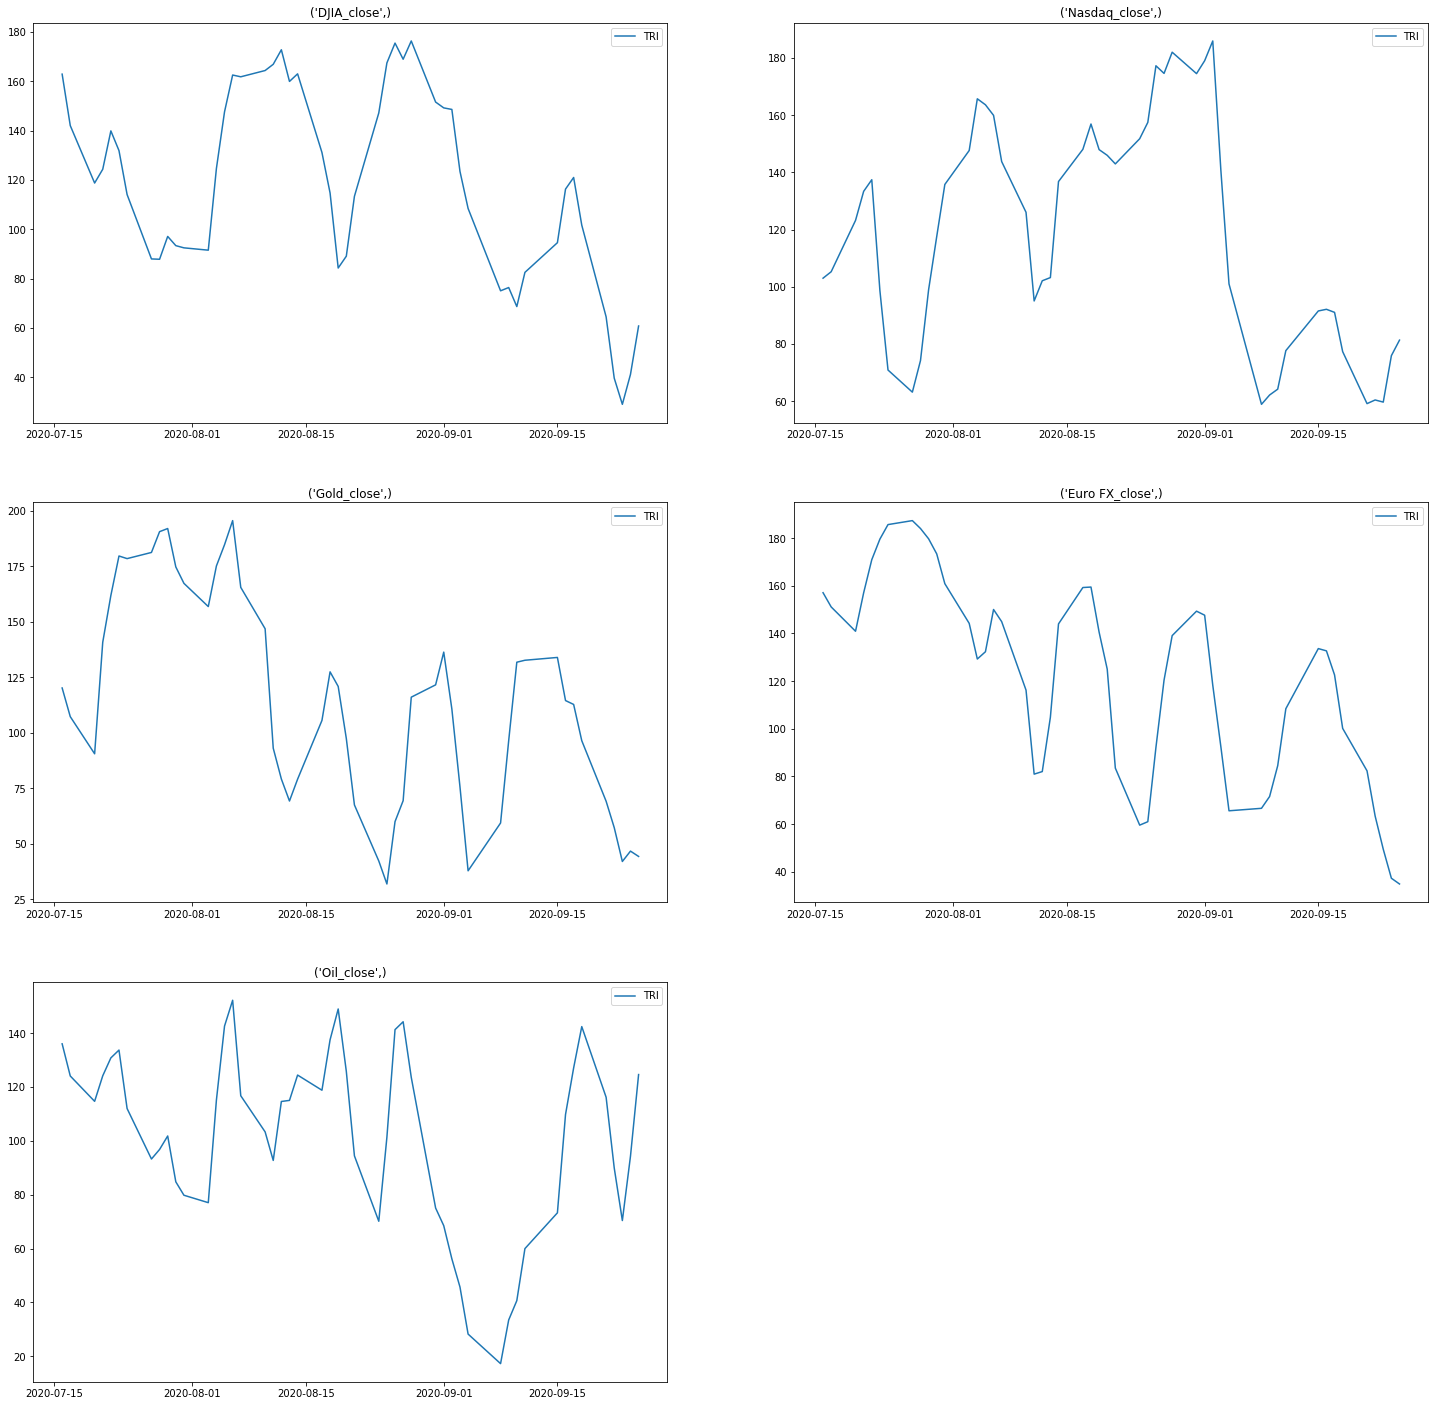

In [31]:
TRI_daily= trading.TRI(close_daily)
trading.plot_TRI(TRI_daily[-50:])

### VHF

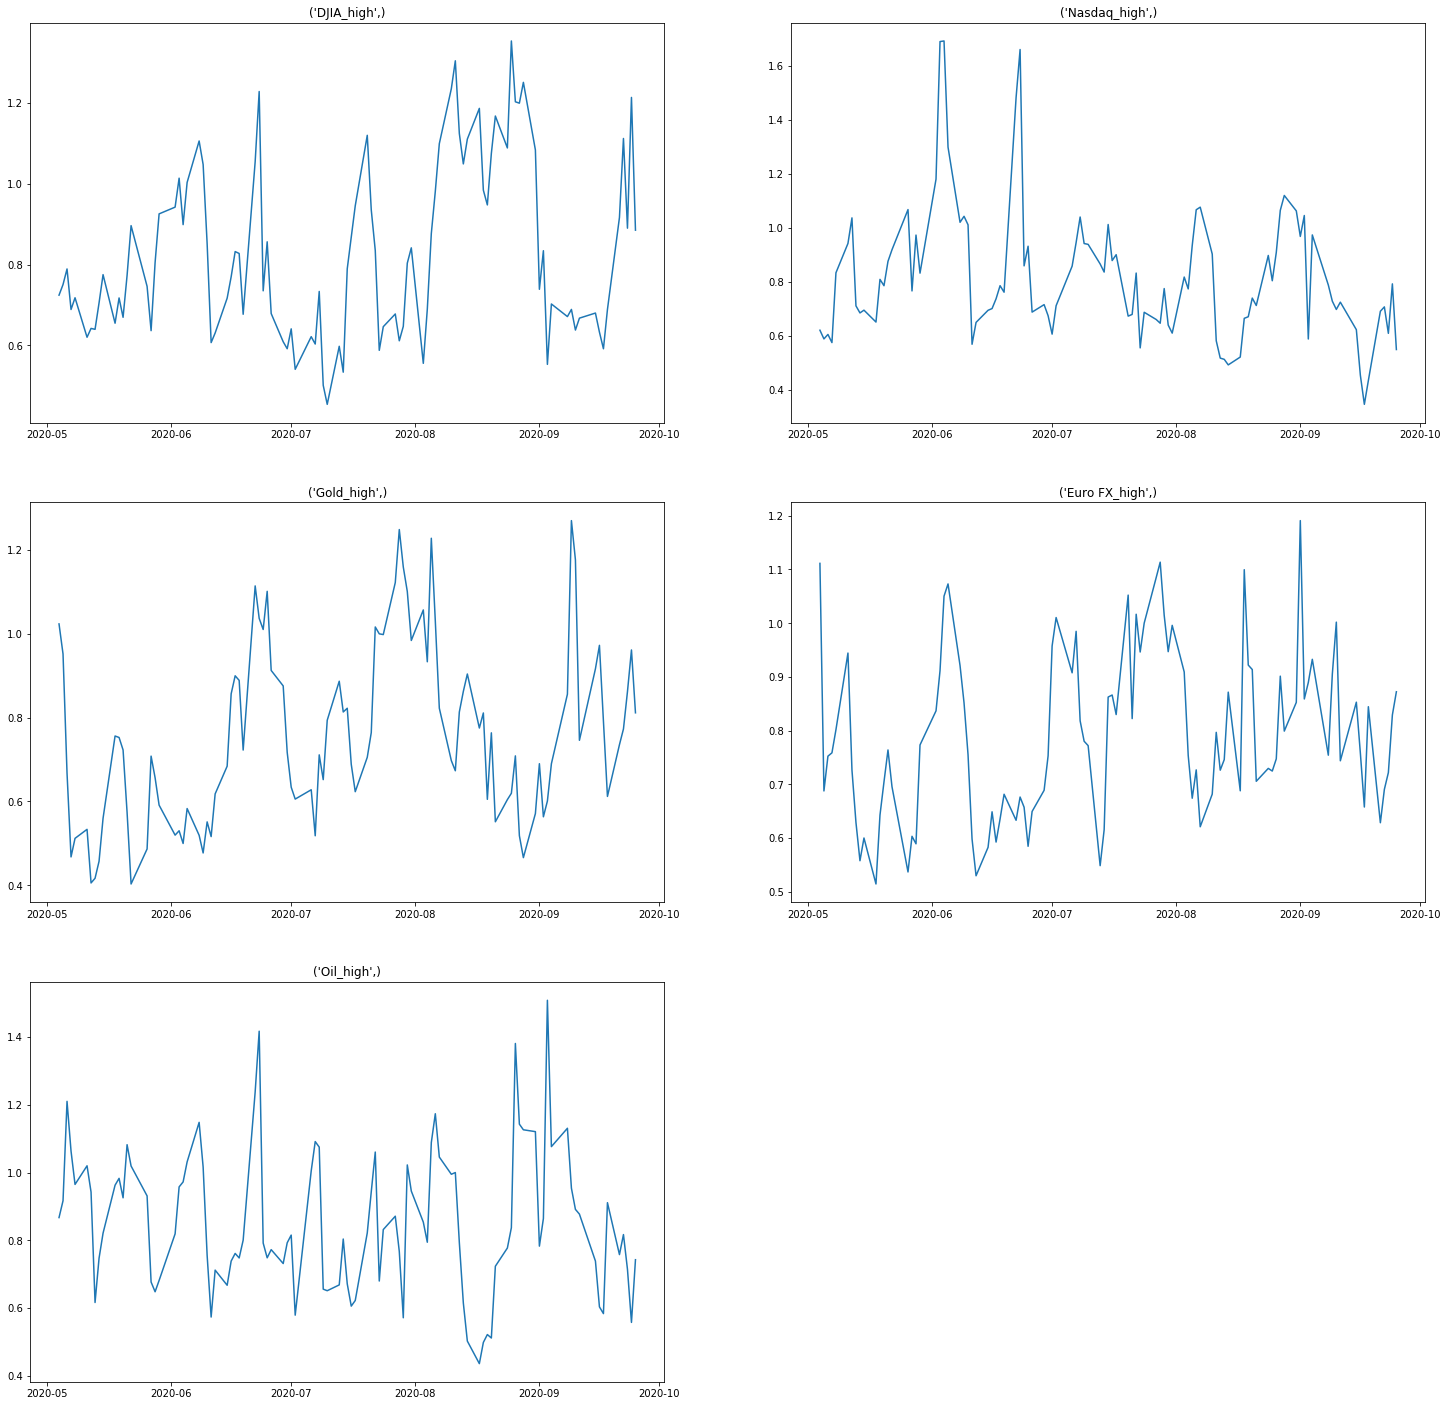

In [32]:
VHF_daily = trading.VHF(close_daily,high_daily,low_daily)
trading.plot_VHF(VHF_daily[-100:])

In [33]:
trading.buy_scan(close_monthly,close_daily,k_slow_daily,d_slow_daily,column)

(                   DJIA  Nasdaq   Gold  Euro FX    Oil
 indicators                                            
 monthly_DMA_25x5   True    True   True     True  False
 macd_monthly       True    True   True     True   True
 daily_DMA_25x5    False   False  False    False  False
 macd_daily        False   False  False    False   True
 daily_DMA_3x3      True   False   True     True  False
 stoch_daily        True   False   True     True  False,
 DJIA       66.666667
 Nasdaq     33.333333
 Gold       66.666667
 Euro FX    66.666667
 Oil        33.333333
 dtype: float64)

In [34]:
trading.sell_scan(close_monthly,close_daily,k_slow_daily,d_slow_daily,column)

(                   DJIA  Nasdaq   Gold  Euro FX    Oil
 indicators                                            
 monthly_DMA_25x5  False   False  False    False   True
 macd_monthly      False   False  False    False  False
 daily_DMA_25x5     True    True   True     True   True
 macd_daily         True    True   True     True  False
 daily_DMA_3x3     False    True  False    False   True
 stoch_daily       False    True  False    False   True,
 DJIA       33.333333
 Nasdaq     66.666667
 Gold       33.333333
 Euro FX    33.333333
 Oil        66.666667
 dtype: float64)